<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Start--Enddate-INput" data-toc-modified-id="Start--Enddate-INput-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Start- Enddate INput</a></span></li><li><span><a href="#Muss-der-Datensatz-umfirmatieret-werden-?" data-toc-modified-id="Muss-der-Datensatz-umfirmatieret-werden-?-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Muss der Datensatz umfirmatieret werden ?</a></span></li><li><span><a href="#test-Dataframe-enthält-die-GESAMTEN-hist.-Dtaen" data-toc-modified-id="test-Dataframe-enthält-die-GESAMTEN-hist.-Dtaen-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>test Dataframe enthält die GESAMTEN hist. Dtaen</a></span></li><li><span><a href="#Ein-Beispielplot-..." data-toc-modified-id="Ein-Beispielplot-...-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Ein Beispielplot ...</a></span></li><li><span><a href="#Produce-Data-Timeframe" data-toc-modified-id="Produce-Data-Timeframe-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Produce Data Timeframe</a></span></li></ul></li><li><span><a href="#Baue-Statistik-zu-ATR" data-toc-modified-id="Baue-Statistik-zu-ATR-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Baue Statistik zu ATR</a></span></li><li><span><a href="#Ermittle-welche-Zeitintervalle-große-Vola-zeigenm" data-toc-modified-id="Ermittle-welche-Zeitintervalle-große-Vola-zeigenm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ermittle welche Zeitintervalle große Vola zeigenm</a></span></li><li><span><a href="#GIbte-es-Trend-im-Sinne-von-clustern-mit-Up-Bewegungen-?" data-toc-modified-id="GIbte-es-Trend-im-Sinne-von-clustern-mit-Up-Bewegungen-?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>GIbte es Trend im Sinne von clustern mit Up Bewegungen ?</a></span><ul class="toc-item"><li><span><a href="#Clusteranalysem" data-toc-modified-id="Clusteranalysem-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Clusteranalysem</a></span></li></ul></li><li><span><a href="#Lade-Datumswerte-mit-Relevanz-(e.g.-FED-Sitzungen,-NFP,-...)-und-plotte-als-Vlines-in-candlegraph" data-toc-modified-id="Lade-Datumswerte-mit-Relevanz-(e.g.-FED-Sitzungen,-NFP,-...)-und-plotte-als-Vlines-in-candlegraph-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lade Datumswerte mit Relevanz (e.g. FED Sitzungen, NFP, ...) und plotte als Vlines in candlegraph</a></span></li><li><span><a href="#Berechen-Verweildauern-unter-bestimmtem-Movingaverage" data-toc-modified-id="Berechen-Verweildauern-unter-bestimmtem-Movingaverage-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Berechen Verweildauern unter bestimmtem Movingaverage</a></span></li><li><span><a href="#Irgendeine-Strategie-ausprobieren" data-toc-modified-id="Irgendeine-Strategie-ausprobieren-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Irgendeine Strategie ausprobieren</a></span></li><li><span><a href="#plot-Candles-with-high-Volume/ATR--bars-?" data-toc-modified-id="plot-Candles-with-high-Volume/ATR--bars-?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>plot Candles with high Volume/ATR  bars ?</a></span><ul class="toc-item"><li><span><a href="#Consolidate-to-daily-or-weekly-or-monthly-bars" data-toc-modified-id="Consolidate-to-daily-or-weekly-or-monthly-bars-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Consolidate to daily or weekly or monthly bars</a></span></li></ul></li></ul></div>

In [1]:
## Imports & Inits 
from turtle import color
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import mplfinance as mpf

from pathlib import Path
import csv

from datetime import datetime
# from datetime import date
import calendar
import pytz
import os
from os import listdir
from os.path import isfile, join

import sys, getopt

# Imports
#from pandas_datareader import data as pdr
#from yahoo_fin import stock_info as si

import numpy as np
from sklearn import linear_model
import scipy.stats


import pandas as pd
import numpy as np

import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
###################################################################

import os
import sys

# matplotlib qt

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn')
plt.rcParams['axes.grid'] = True

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


currentdir = os.path.abspath('')
parentdir = os.path.realpath(os.path.join(currentdir, '..'))
sys.path.insert(0, parentdir) 
libdir = os.path.realpath(os.path.join(parentdir, 'TC'))
sys.path.insert(0, libdir)

import signalgenerator as sg
import underly  as ul

from lib import Indikatoren

#from sympy import maximum

import RSI_strat_SETUP


#init_notebook_mode()

from lib import Indikatoren

#pio.renderers.default = "vscode"
#pio.renderers.default = "browser"

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))


def plot_system2(data,vol="FALSE"):
    df2 = data.copy()
    dates = np.arange(len(df2)) # We need this for mpl.plot()
    price = df2['Close']
    h_sma = df2['Close'].ewm(span=200,adjust=False).mean()
    l_sma = df2['Close'].ewm(span=100,adjust=False).mean()
    c_ema = df2['Close'].ewm(span=2,adjust=False).mean()
    
    if vol==True:
        with plt.style.context('fivethirtyeight'):
            fig, axes = plt.subplots(2,figsize=(10,10))
            mpf.plot(df2, ax=axes[0],  show_nontrading=False, type='candle')
            #ax.plot(dates, h_sma, linewidth=2, color='red', label='200EMA')
            #ax.plot(dates, l_sma, linewidth=2, color='green', label='100EMA')
            axes[0].plot(dates, h_sma, linewidth=1, color='blue', label='200EMA')
            axes[0].axhline(y=1935)
            axes[1].plot(df2["Volume"],color='purple', label='Vol.')
            axes[1].plot(df2["Volume"].ewm(span=21,adjust=False).mean(),linewidth=0.2,color='red', label='Vol.')
            plt.title("A System ")
            #ax.set_ylabel('Price($)')
            #plt.legend()
    else:
        with plt.style.context('fivethirtyeight'):
            mpf.plot(df2,tight_layout=True,show_nontrading=False, figscale=2, type='candle')
            plt.title("A System ")
    plt.show() # This is needed outside of Jupyter

def figupdate_nonHist(figure,xtit="",ytit=""):
    figure.update_layout(
        height=500,
        xaxis_title=xtit,
        yaxis_title=ytit,
        font=dict(
                family="Arial",
                size=8,
                color='#000000'
            ),
        )
    figure.show()

def figupdate(figure):
    figure.update_layout(
        height=500,
        font=dict(
                family="Arial",
                size=8,
                color='#000000'
            ),
        )
    figure.show()


def hist_cum_plot(df,title="Histogramn and Cum Dist.",bin=30,blocker=False): 
    fig, ax = plt.subplots(2,figsize=(8,6))
    fig.suptitle(title,fontsize = 6)
    sns.histplot(df,bins=bin,stat="density",ax=ax[0])
    
    print("------------------------------------------")
    print(title+"\n")
    print(df.describe())
    print("------------------------------------------")
    sns.histplot(df,bins=bin,cumulative=1,stat="density",ax=ax[1])
    plt.show(block=blocker)

def hist_cum_plot_simple(df,title="Histogramn and Cum Dist.",bin=30,blocker=False): 
    fig, ax = plt.subplots(1,figsize=(6,4))
    fig.suptitle(title,fontsize = 8)
    sns.histplot(df,bins=bin,stat="density",ax=ax)
    print(df.describe())
    plt.show(block=blocker)


#Relative Strength Index
def RSI(df, n):
    #df["EMA200"]=df["Factor"].ewm(span=200,adjust=False).mean()
    close = df["Close"]
    delta = close.diff()
# Get rid of the first row, which is NaN since it did not have a previous
# row to calculate the differences
    delta = delta[1:]

# Make the positive gains (up) and negative gains (down) Series
    up, down = delta.clip(lower=0), delta.clip(upper=0).abs()

# Calculate the RSI based on EWMA
# Reminder: Try to provide at least `window_length * 4` data points!
    roll_up = up.rolling(n).mean()
    roll_down = down.rolling(n).mean()
    rs = roll_up / roll_down
    rsi_ema = 100.0 - (100.0 / (1.0 + rs))

# Calculate the RSI based on SMA
    roll_up = up.rolling(n).mean()
    roll_down = down.rolling(n).mean()
    rs = roll_up / roll_down
    rsi_sma = 100.0 - (100.0 / (1.0 + rs))



    df["rsi_ewma"]=rsi_ema
    df["rsi_sma"]=rsi_sma
    return df


def some_func(a, b):
    return datetime.combine(a, datetime.strptime(b,'%H:%M').time())

#########################################
myrcparams={'axes.labelsize':'large'}
mystyle = mpf.make_mpf_style(base_mpf_style='yahoo',rc=myrcparams)

C:\Users\r889990\AppData\Local\Temp\2/ipykernel_27336/647556135.py:54: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



hier:  C:\Temp\Trading\ETFS\Analyse_data


## Start- Enddate INput 

In [2]:
# Widgets
startdate=widgets.Text(
    value='2023-01-01',
    placeholder='yyyy-mm-dd',
    description='Start Date',
    disabled=False   
)

enddate=widgets.Text(
    value='2023-06-06',
    placeholder='yyyy-mm-dd',
    description='End Date',
    disabled=False   
)


# Widgets
startdate2=widgets.Text(
    value='2023-10-01',
    placeholder='yyyy-mm-dd',
    description='Plot von',
    disabled=False   
)

enddate2=widgets.Text(
    value='2023-06-06',
    placeholder='yyyy-mm-dd',
    description='PLot bis',
    disabled=False   
)


display(startdate,enddate,startdate2,enddate2)


Text(value='2023-01-01', description='Start Date', placeholder='yyyy-mm-dd')

Text(value='2023-06-06', description='End Date', placeholder='yyyy-mm-dd')

Text(value='2023-10-01', description='Plot von', placeholder='yyyy-mm-dd')

Text(value='2023-06-06', description='PLot bis', placeholder='yyyy-mm-dd')

In [7]:
## Read Data
universe = "fx"
#ticker = "cl-15m_bk"
#ticker = "gc-15m_bk"
#ticker = "dax-15m_bk"
ticker = "bund-15m_bk_clean"

t_bwd = 10
r_bwd = 10000
t_fwd=  10
greatersmaller="smaller"


#pf=ul.underlying(universe,ticker)
#pf.read_grabbed_data(True)
# startdatum = "2011-01-01"

#Alternativ:
# file_to_read="C:\\Temp\\Trading\\ETFS\\RES_fx\\Data\\"+ticker+".csv"
# custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")
# test = pd.read_csv(file_to_read,sep=";",decimal='.',index_col=["Date"],usecols=["Date","High","Open","Low","Close","Volume"],parse_dates=['Date'],date_parser=custom_date_parser)

file_to_read="C:\\Temp\\Trading\\ETFS\\RES_fx\\Data\\"+ticker+".csv"
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
test = pd.read_csv(file_to_read,sep=";",decimal='.',usecols=["Date","High","Open","Low","Close","Volume"],parse_dates=['Date'],date_parser=custom_date_parser)
test.set_index("Date",inplace=True,drop=True)

# Read Data file from vendor 
#test = pd.read_csv(file_to_read,sep=";",decimal='.',usecols=["Date","Time","High","Open","Low","Close","Volume"],parse_dates=['Date'],date_parser=custom_date_parser)
    
# mytime = dt.datetime.strptime('0130','%H%M').time()
# mydatetime = dt.datetime.combine(dt.date.today(), mytime)    
    

In [8]:
test

,Open,High,Low,Close,Volume
Date,,,,,
2000-06-07 07:30:00,104.4180,104.4180,104.3589,104.3589,4969
2000-06-07 07:45:00,104.3589,104.3589,104.2998,104.3195,9096
2000-06-07 08:00:00,104.3195,104.3490,104.2801,104.3392,5940
2000-06-07 08:15:00,104.3392,104.3983,104.3392,104.3983,6047
2000-06-07 08:30:00,104.3983,104.4279,104.3293,104.3392,11732
...,...,...,...,...,...
2023-10-04 04:30:00,126.9200,126.9300,126.8700,126.8900,498
2023-10-04 04:45:00,126.8900,126.9100,126.8800,126.9000,60
2023-10-04 05:00:00,126.9000,126.9000,126.8500,126.8900,416


## Muss der Datensatz umfirmatieret werden ?

In [4]:
# Using apply:
## Baue Dataframe mit Date Spalte, die auch Datetime bereitstellt, mit der ich arbeitne kann.
test['Ddate'] = list(map(some_func,test["Date"],test['Time']))
######################################################################
test["Ddate_US"]=test["Ddate"]
test.drop('Date', axis=1, inplace=True)
test.drop('Time', axis=1, inplace=True)

test.set_index("Ddate",inplace=True,drop=True)

# est = pytz.timezone('US/Eastern')
utc = pytz.utc
# eu  = pytz.timezone('Europe/Berlin')
#fmt = '%Y-%m-%d %H:%M:%S %Z%z'
#fmt = '%Y-%m-%d %H:%M:%S'

# t=1000

# dt_object = datetime(test.index[t].year,test.index[t].month,test.index[t].day,test.index[t].hour,test.index[t].minute,test.index[t].second)
# #dt_object = datetime(2000,9,10,6,0,0)
 
# m=my_tz.localize(dt_object)
# print("NewYork",m.strftime(fmt))
# print("Berlin",m.astimezone(eu).strftime(fmt))

## Baue Liste von Datetime Objekten
## mit BAsis US/Eatstern time:

In [5]:
# Erzeuge Column, die Deutshce Zeit enthält
est = pytz.timezone('US/Eastern') 
eu  = pytz.timezone('Europe/Berlin')
utc = pytz.utc

tt=list(map(lambda t: \
         est.localize(datetime(t.year,t.month,t.day,t.hour,t.minute,t.second)),test.index))

## Setze weitere Datumsplate mit EU Datetime:
fmt = '%Y-%m-%d %H:%M:%S'
ttEU=[t.astimezone(eu).strftime(fmt) for t in tt]
#test["DateEU"]=ttEU
test["DateEU"]=list(map(lambda t: datetime.strptime(t,fmt),ttEU))
# Example with the standard date and time format

test.Ddate=test.index
test.rename(columns={"DateEU":"Date"},inplace=True)
test.set_index("Date",inplace=True,drop=True)

#Speicher ab !
test.to_csv("C:\\Temp\\Trading\\ETFS\\RES_fx\\Data\\"+ticker+"_clean.csv",sep=";",decimal='.', float_format='%.4f',)     

C:\Users\r889990\AppData\Local\Temp\1/ipykernel_1776/3271267797.py:16: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



## test Dataframe enthält die GESAMTEN hist. Dtaen

In [9]:
# Widgets
startdate=widgets.Text(
    value='2023-01-01',
    placeholder='yyyy-mm-dd',
    description='Start Date',
    disabled=False   
)

enddate=widgets.Text(
    value='2023-06-06',
    placeholder='yyyy-mm-dd',
    description='End Date',
    disabled=False   
)


# Widgets
startdate2=widgets.Text(
    value='2023-10-01',
    placeholder='yyyy-mm-dd',
    description='Plot von',
    disabled=False   
)

enddate2=widgets.Text(
    value='2023-06-06',
    placeholder='yyyy-mm-dd',
    description='PLot bis',
    disabled=False   
)


display(startdate,enddate,startdate2,enddate2)

Text(value='2023-01-01', description='Start Date', placeholder='yyyy-mm-dd')

Text(value='2023-06-06', description='End Date', placeholder='yyyy-mm-dd')

Text(value='2023-10-01', description='Plot von', placeholder='yyyy-mm-dd')

Text(value='2023-06-06', description='PLot bis', placeholder='yyyy-mm-dd')

In [83]:
startD = startdate.value+" 08:00:00"
endD = enddate.value+" 08:00:00"

In [84]:
#startD="2023-02-01 08:00:00"
#endD="2023-04-04 08:00:00"
#test[startD:endD]

## Ein Beispielplot ...

C:\Users\r889990\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




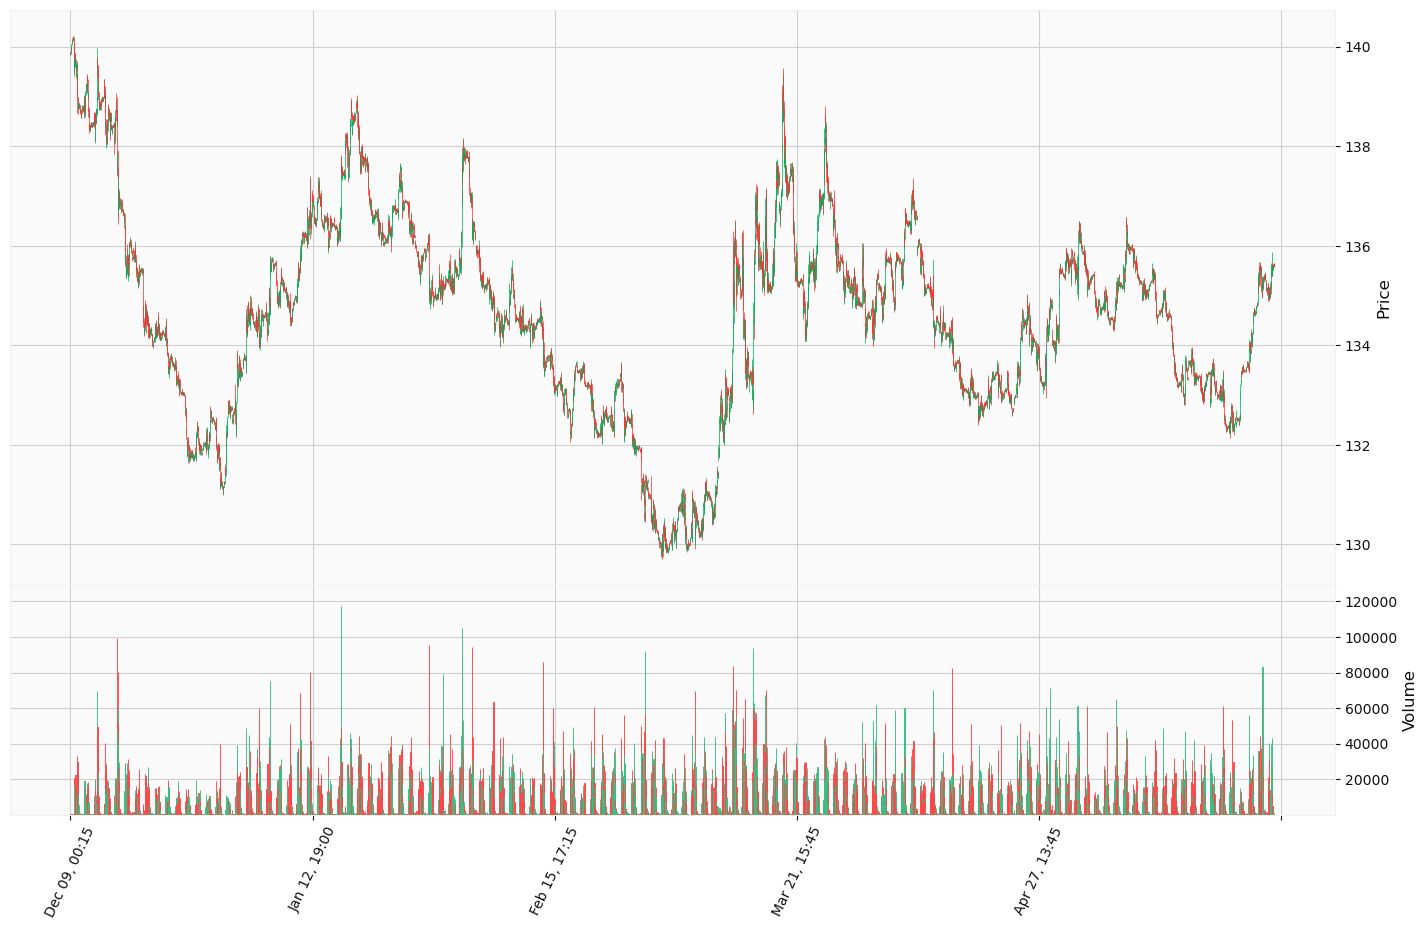

In [142]:
# Ein bsp plot
lower=100
upper=2000

candle_data = mpf.make_addplot(test[startD:endD][['Open', 'Close', 'High', 'Low',"Volume"]], type='candle')
    ###
    ## Now the INdicators noch, die ich sehen moechte:

#p2=mpf.make_addplot(a_week["21dayEMA"])
#p3=mpf.make_addplot(a_week["VP"])
#p4=mpf.make_addplot(a_week["50dayEMA"])


#plotsadded=[candle_data]

## Wecleh



mpf.plot(test["2022-12-09":"2023-06-01"],style=mystyle, volume=True,  xrotation = 65,\
                            title="",figscale=2.0, \
                            figratio=(16, 10),returnfig=True)
mpf.show()  

## Produce Data Timeframe

In [73]:
daten_daily

,High,Low,Open,Close,Volume,ATR21
Date,,,,,,
2016-01-04,156.7323,156.1210,156.1802,156.3971,409516,NaN
2016-01-05,157.0282,156.2393,156.2590,156.8704,478703,NaN
2016-01-06,157.6888,156.9493,156.9789,157.4423,485625,NaN
2016-01-07,157.9550,156.8211,157.7184,157.2944,737841,NaN
2016-01-08,157.6198,156.8507,157.0775,157.5803,528056,NaN
...,...,...,...,...,...,...
2020-12-22,173.8564,173.4073,173.4757,173.8173,329563,0.655536
2020-12-23,173.9443,172.8021,173.8369,173.1437,485791,0.699779
2020-12-28,173.5440,172.9583,173.1340,173.5049,194473,0.689408


In [95]:
# Fuelle den Dataframe mit weiteren Indikatoren und relevanten Scalars
mypath = RSI_strat_SETUP.mypath

#onlyfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and not f.startswith("_")) ]

b=[]
c=[]
figs=[]
counter  = 0

###########################
##########################
time_gap_fwd = t_fwd
time_gap_back = t_bwd
rsi_threshold =75
return_threshold = r_bwd
my_bins = 50
########################
########################


####  data enthaelt die Daten des ausgesuchten Zeitfensters
##############################################################
##############################################################
data=test[startD:endD]
##############################################################
##############################################################


# make hourly timeseries
#############################
# f="H"
# #############################
# High_d=data["High"].groupby(pd.Grouper(freq=f)).max()
# Low_d=data["Low"].groupby(pd.Grouper(freq=f)).min()
# open_d=data["Open"].groupby(pd.Grouper(freq=f)).first()
# volume_d=data["Volume"].groupby(pd.Grouper(freq=f)).sum()
# close_d=data["Close"].groupby(pd.Grouper(freq=f)).last()



# d = {"High":High_d,"Low":Low_d,"Open":open_d,"Close":close_d,"Volume":volume_d}
# daten= pd.DataFrame(d)
# daten=daten.dropna()
# ## daten[] sind die auf den gewuenschten Zeitrahemn gebrachten uersprungsdaten
# ##########################################

# daten["pctchg"]=daten["Close"].pct_change()
# daten['Factor'] =  (daten['pctchg'] + 1).cumprod()
# daten=Indikatoren.ATR(daten,1)
# daten=Indikatoren.ATR(daten,100)
# daten["Mean_Vol"]=daten["Volume"].ewm(span=21,adjust=False).mean()
# daten["ATR_Vol"]=daten["Volume"]*(daten["ATR1"]/daten["ATR100"])
# daten=Indikatoren.Zscore_rolling(daten,"ATR_Vol",100)


# make daily timeseries
#############################
f="D"
#############################
High_d=data["High"].groupby(pd.Grouper(freq=f)).max()
Low_d=data["Low"].groupby(pd.Grouper(freq=f)).min()
open_d=data["Open"].groupby(pd.Grouper(freq=f)).first()
volume_d=data["Volume"].groupby(pd.Grouper(freq=f)).sum()
close_d=data["Close"].groupby(pd.Grouper(freq=f)).last()
daten["pctchg"]=daten["Close"].pct_change()




d = {"High":High_d,"Low":Low_d,"Open":open_d,"Close":close_d,"Volume":volume_d}
daten_daily= pd.DataFrame(d)
daten_daily=daten_daily.dropna()

daten_daily=Indikatoren.ATR(daten_daily,21)
daten_daily["pctchg"]=daten_daily["Close"].pct_change()



# make weekly timeseries
#############################
# f="W-Mon"
# #############################
# High_d=data["High"].groupby(pd.Grouper(freq=f)).max()
# Low_d=data["Low"].groupby(pd.Grouper(freq=f)).min()
# open_d=data["Open"].groupby(pd.Grouper(freq=f)).first()
# volume_d=data["Volume"].groupby(pd.Grouper(freq=f)).sum()
# close_d=data["Close"].groupby(pd.Grouper(freq=f)).last()



# d = {"High":High_d,"Low":Low_d,"Open":open_d,"Close":close_d,"Volume":volume_d}
# daten_weekly= pd.DataFrame(d)
# daten_weekly=daten_weekly.dropna()

# Weeks=daten_weekly



# data=Indikatoren.ATR(data,20)
# data["EMA50"]=data["Factor"].ewm(span=50,adjust=False).mean()
# data["EMA10"]=data["Factor"].ewm(span=10,adjust=False).mean()
# data["EMA21"]=data["Factor"].ewm(span=21,adjust=False).mean()
# data["EMA100"]=data["Factor"].ewm(span=100,adjust=False).mean()
# data["EMA80"]=data["Factor"].ewm(span=80,adjust=False).mean()
# data["EMA200"]=data["Factor"].ewm(span=200,adjust=False).mean()




# Baue Statistik zu ATR

In [120]:
ATRDays = np.where( (daten_daily["Open"]- daten_daily["Close"]) >= 2*daten_daily["ATR21"],1,0)
daten_daily["ATRdays"]=ATRDays
Dates = daten_daily.loc[daten_daily["ATRdays"]>0].index


In [ ]:
# Wieviel Downdays oder Updays nach grossen ATR TAgen ?

In [139]:

D=[daten_daily[Dt:Dt+pd.DateOffset(days=12)]["pctchg"].loc[daten_daily[Dt:Dt+pd.DateOffset(days=12)]["pctchg"]<0].count() for Dt in Dates]
    
U=[daten_daily[Dt:Dt+pd.DateOffset(days=12)]["pctchg"].loc[daten_daily[Dt:Dt+pd.DateOffset(days=12)]["pctchg"]>0].count() for Dt in Dates]

In [140]:
daten_daily.loc["2023-03-15"]

High       1.372427e+02
Low        1.326272e+02
Open       1.332041e+02
Close      1.362480e+02
Volume     1.615392e+06
ATR21      1.915327e+00
pctchg     2.231723e-02
ATRdays    0.000000e+00
Name: 2023-03-15 00:00:00, dtype: float64

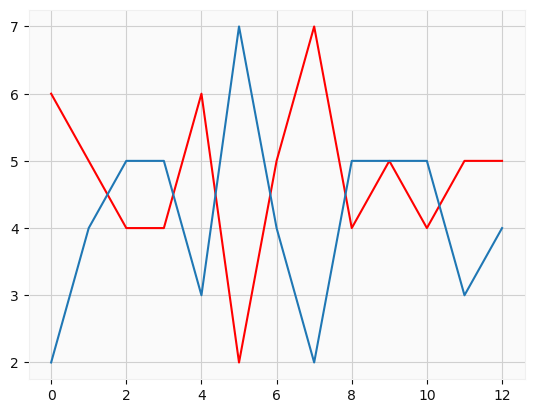

In [141]:
plt.plot(D,color="red")
plt.plot(U)


<Axes: xlabel='Date'>

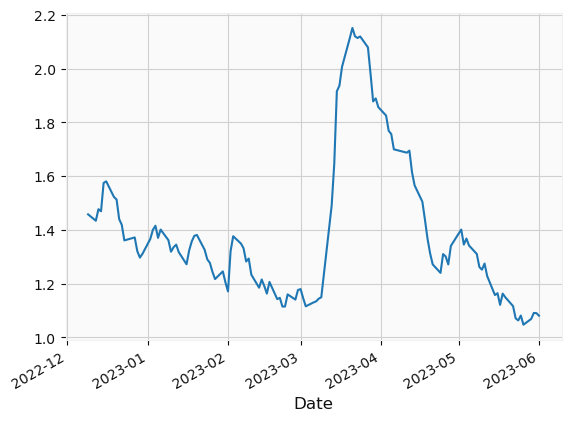

In [145]:
daten_daily["2022-12-09":"2023-06-01"]["ATR21"].plot()

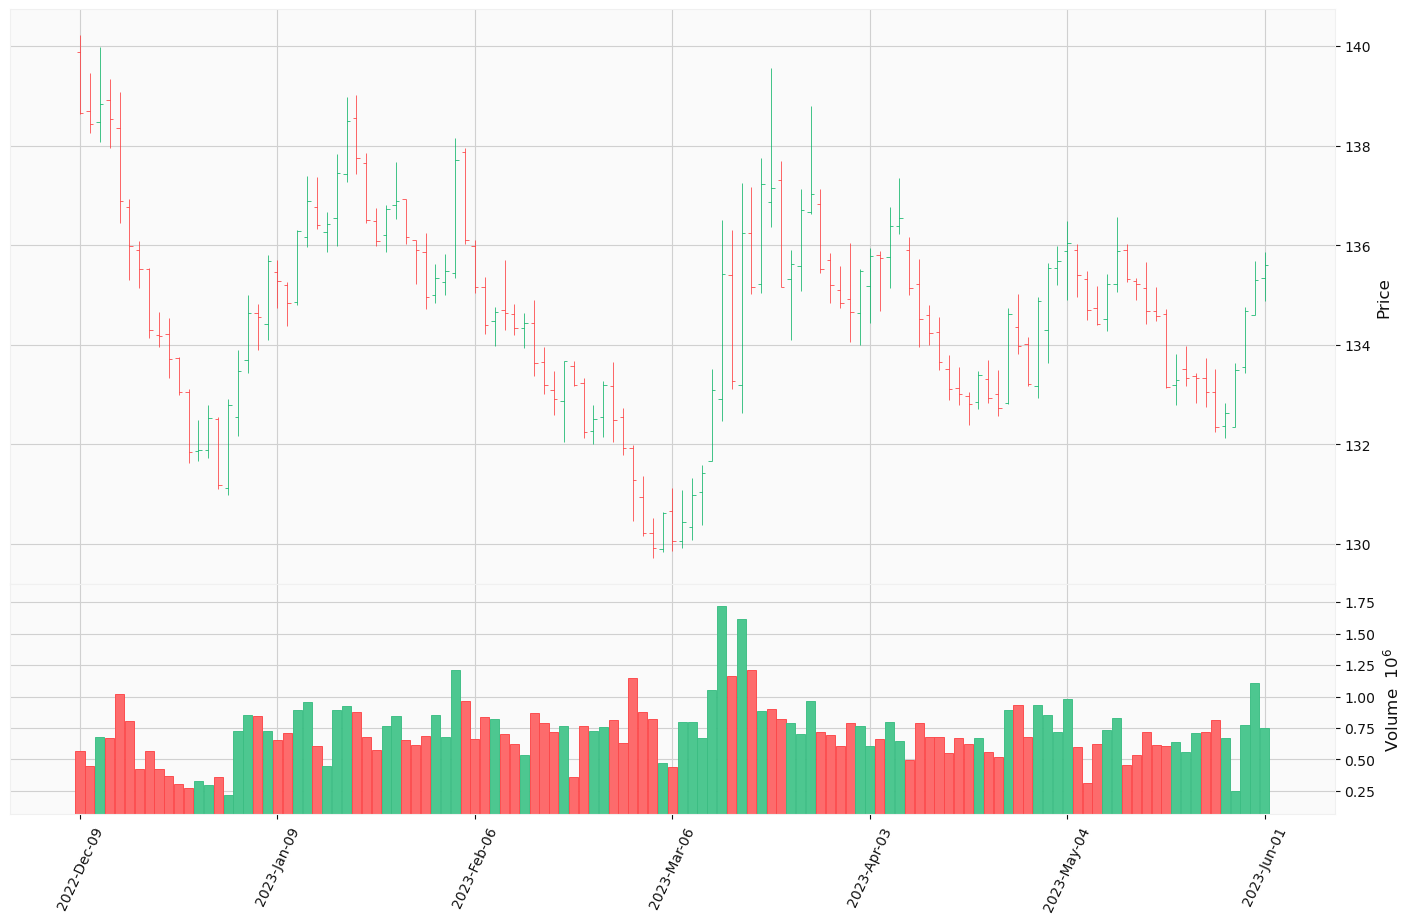

In [144]:
candle_data = mpf.make_addplot(daten_daily[Dt:Dt+pd.DateOffset(days=8)][['Open', 'Close', 'High', 'Low',"Volume"]], type='candle')
        ###
        ## Now the INdicators noch, die ich sehen moechte:

    #p2=mpf.make_addplot(a_week["21dayEMA"])
    #p3=mpf.make_addplot(a_week["VP"])
    #p4=mpf.make_addplot(a_week["50dayEMA"])


    #plotsadded=[candle_data]

    ## Wecleh



mpf.plot(daten_daily["2022-12-09":"2023-06-01"],style=mystyle, volume=True,  xrotation = 65,\
                                title="",figscale=2.0, \
                                figratio=(16, 10),returnfig=True)
mpf.show() 

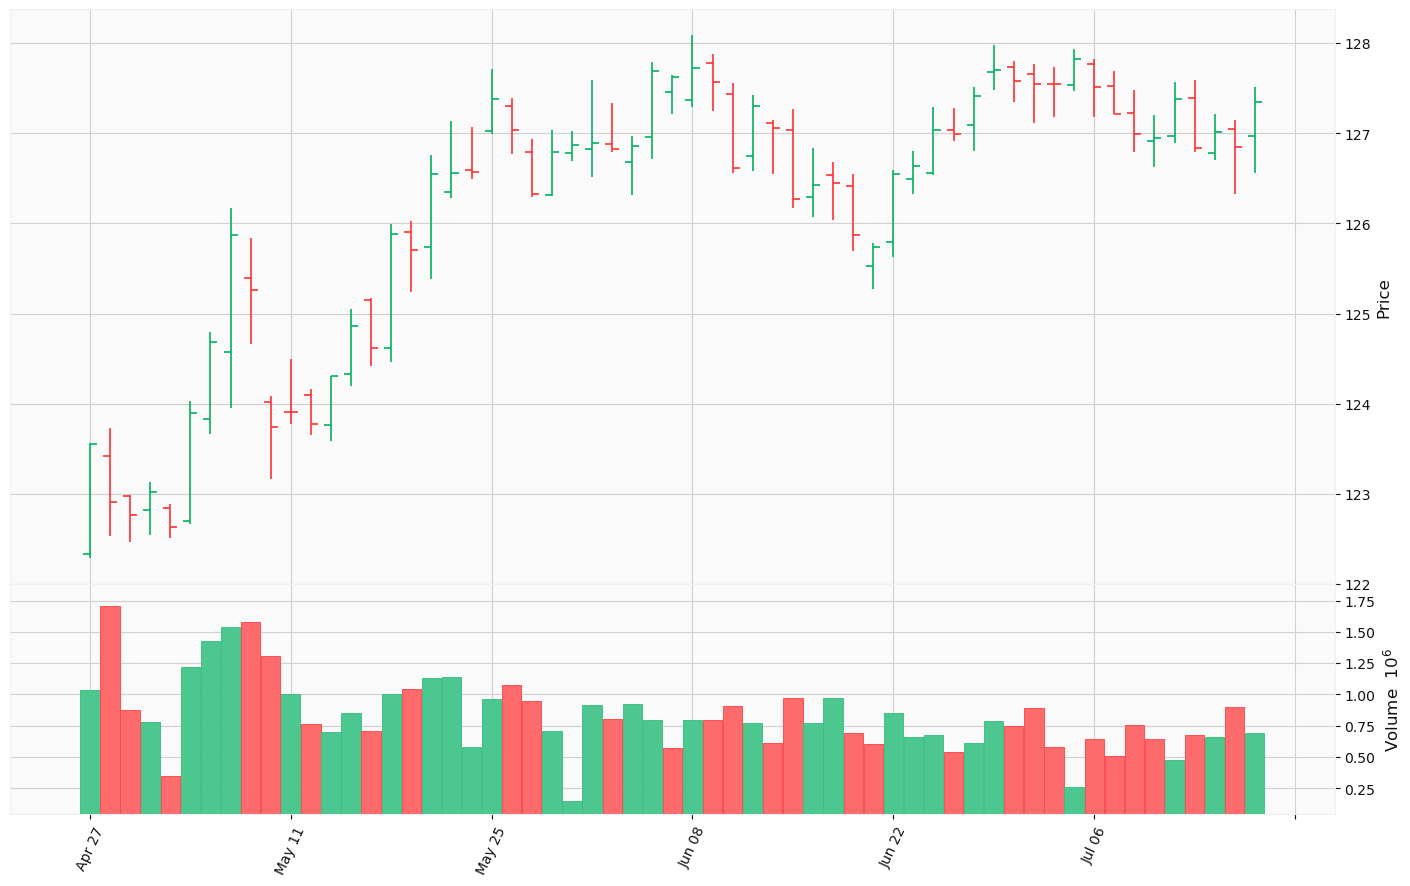

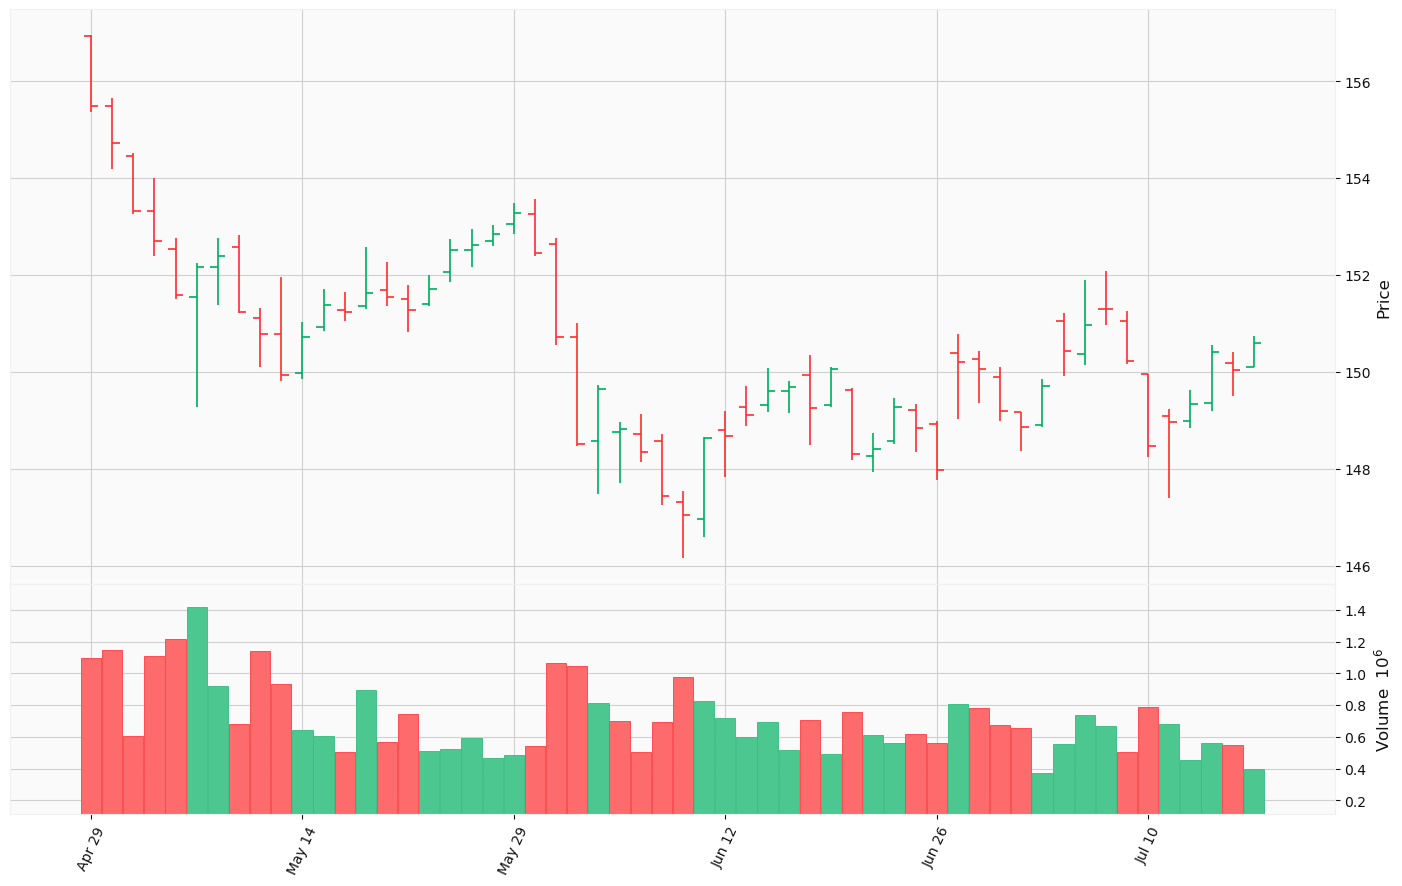

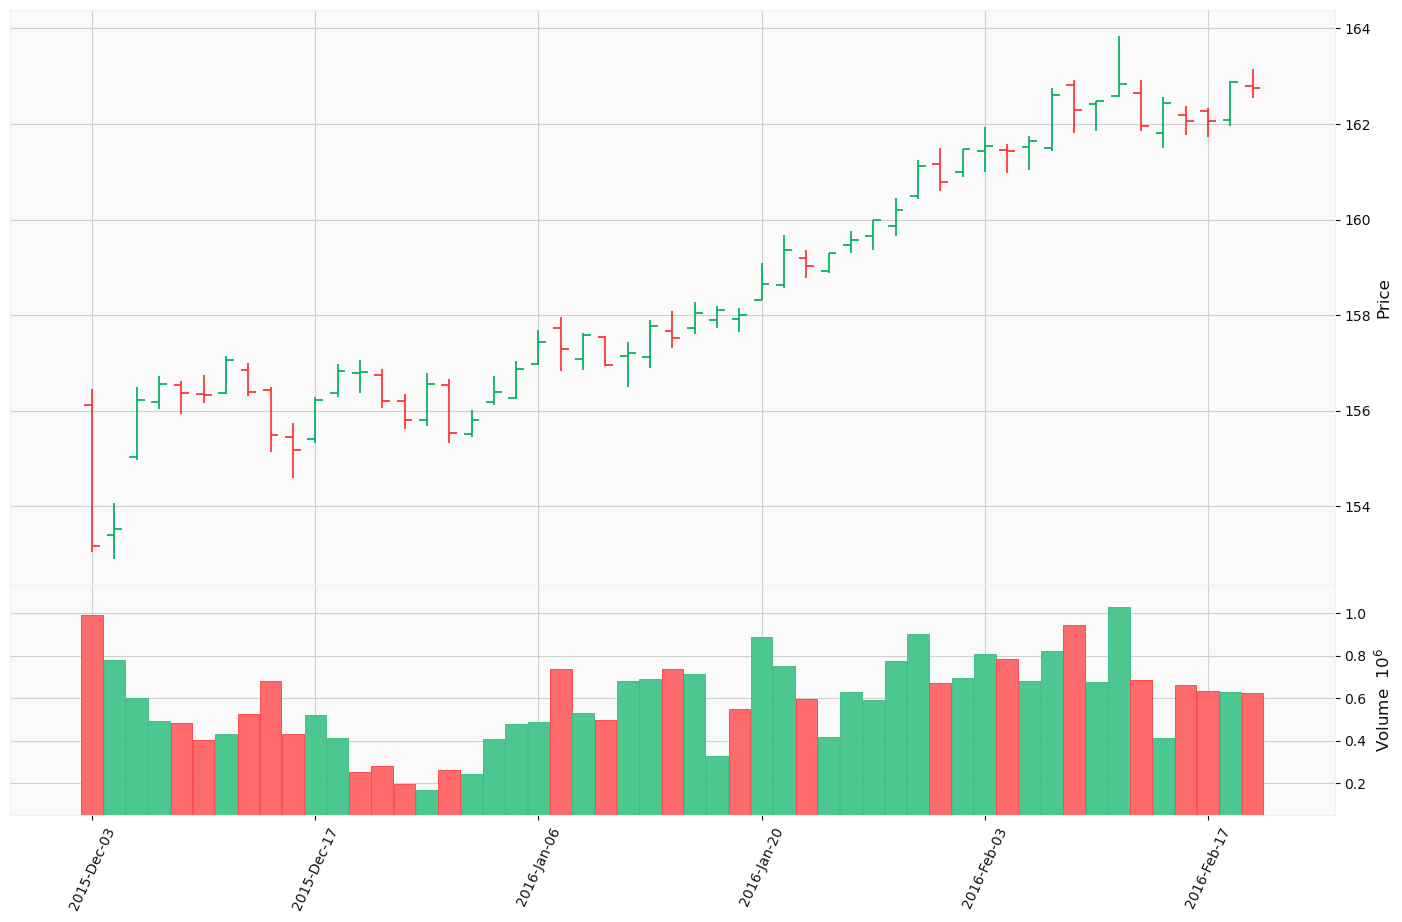

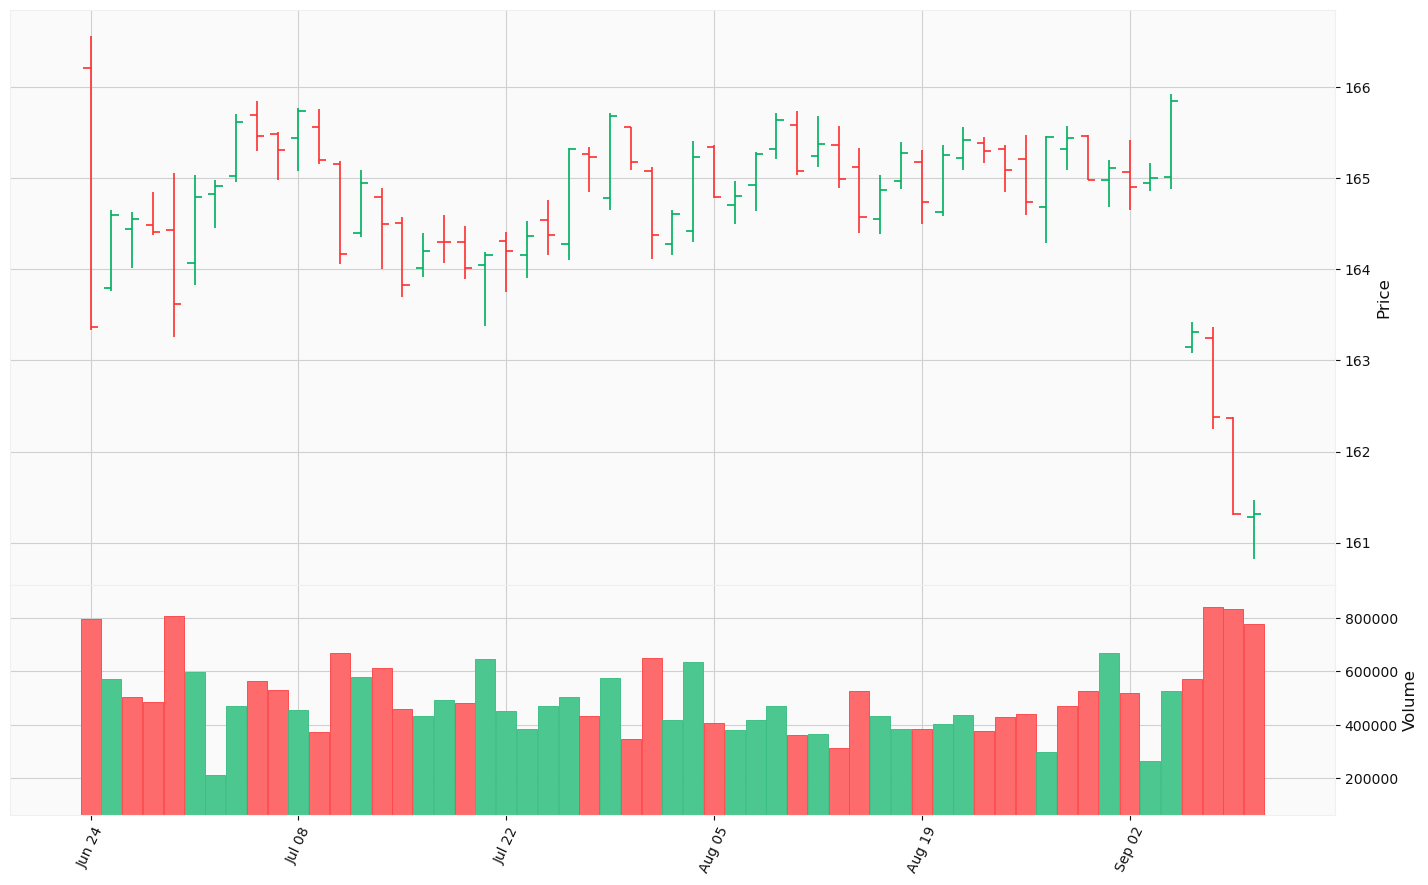

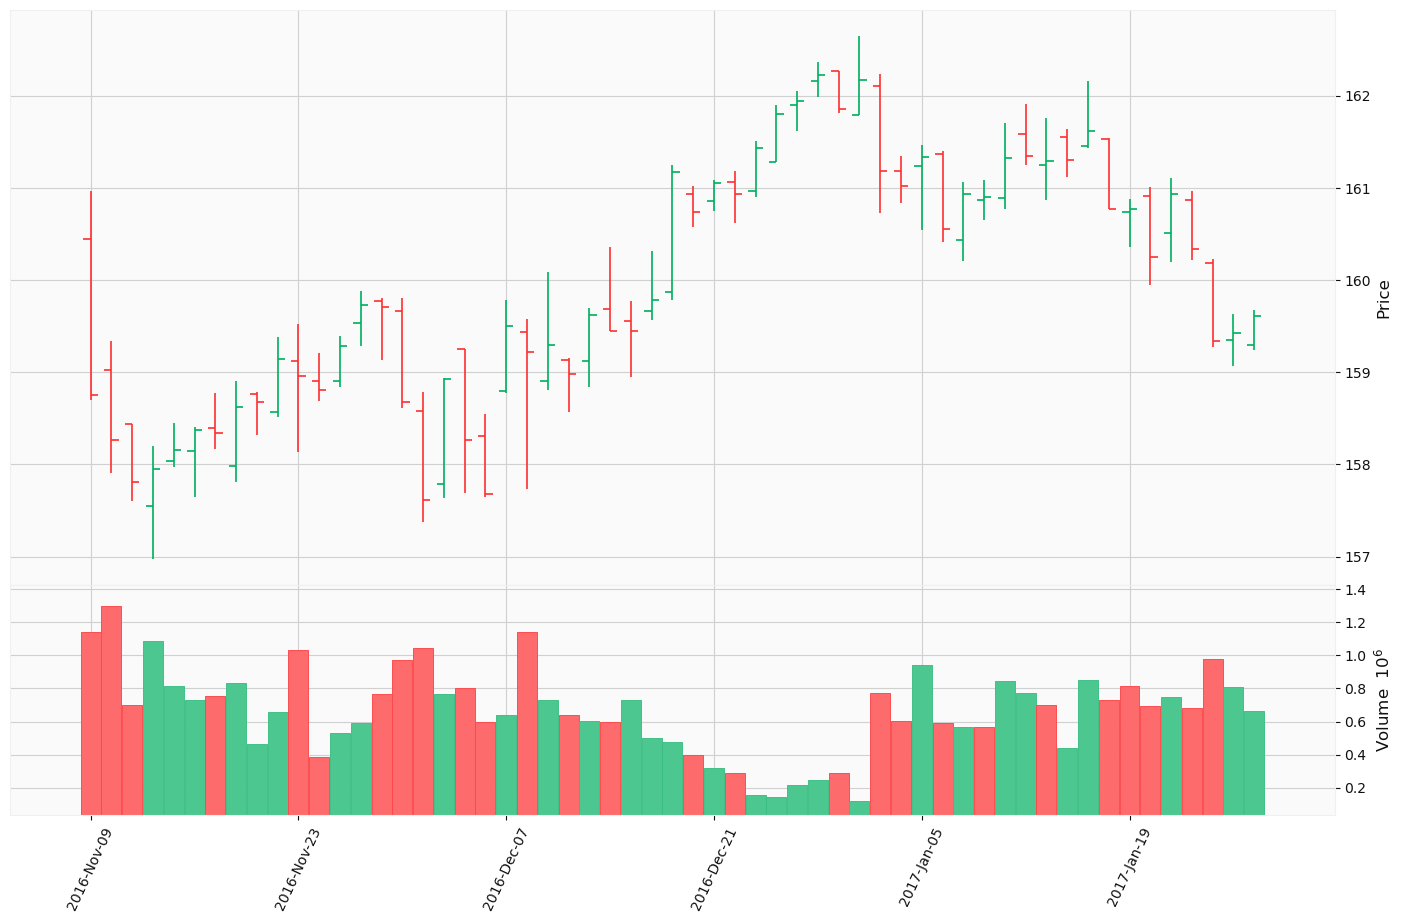

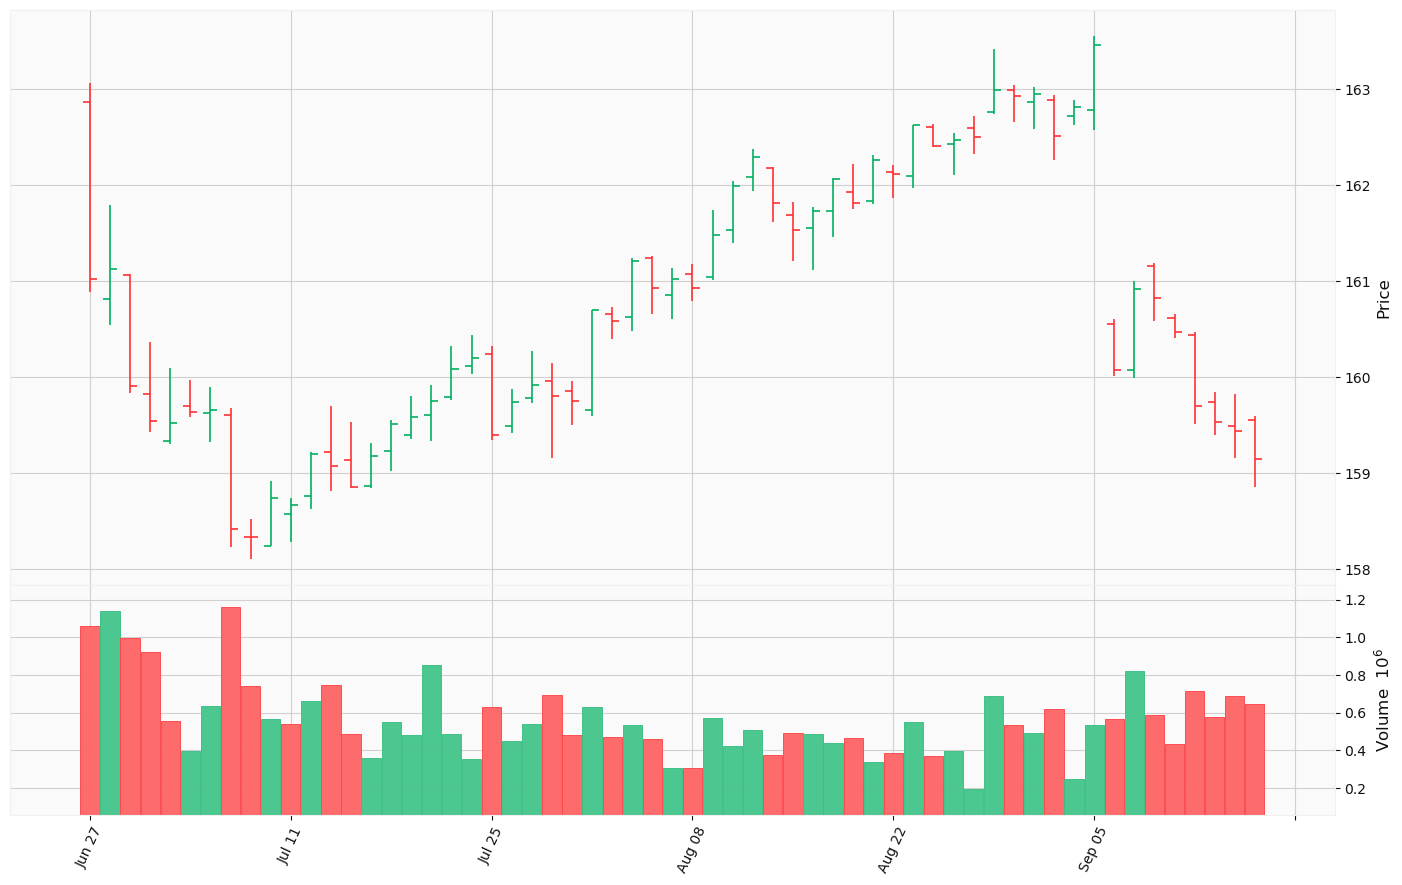

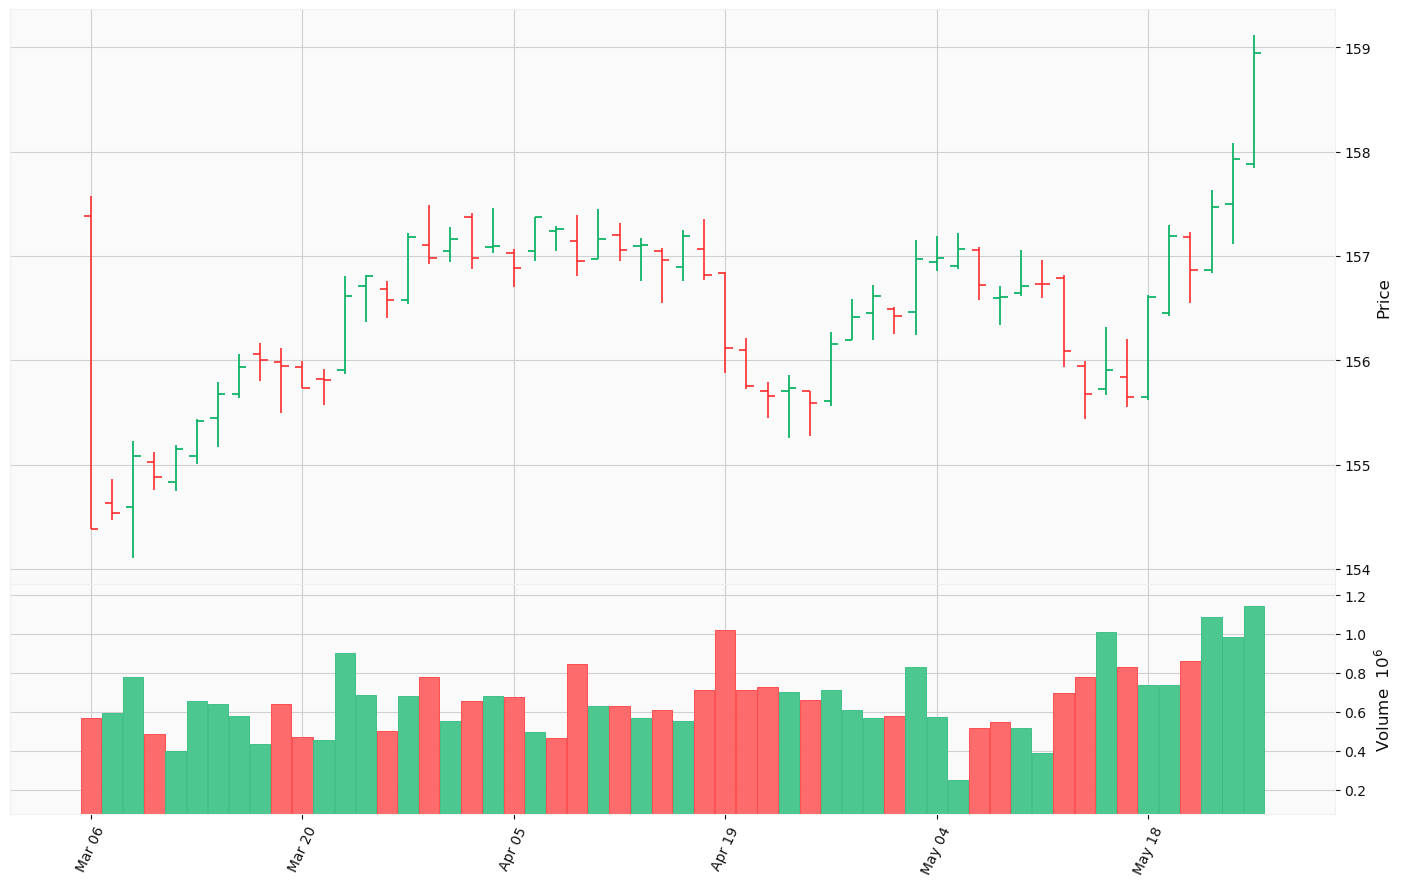

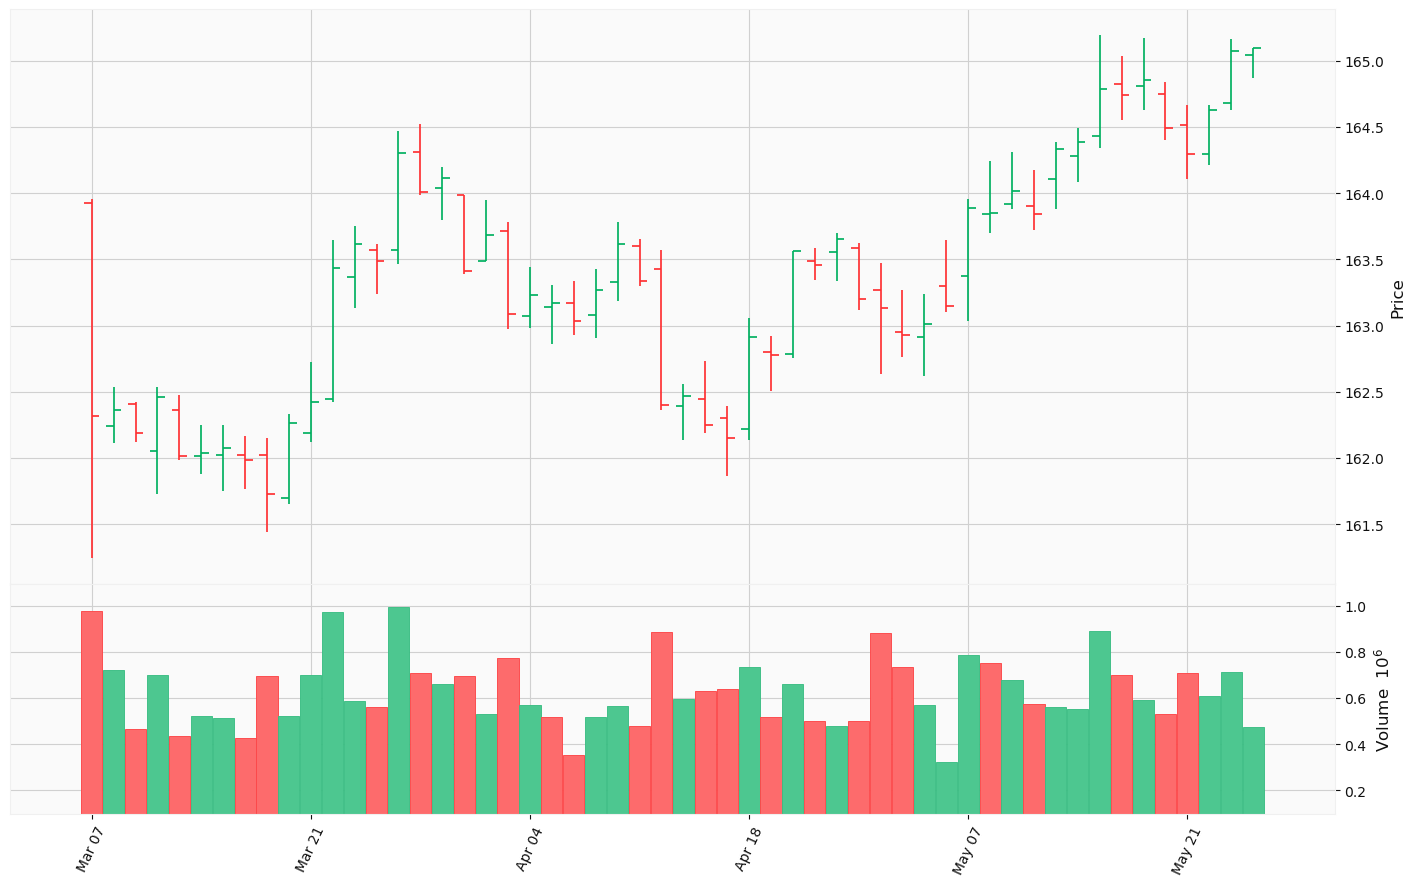

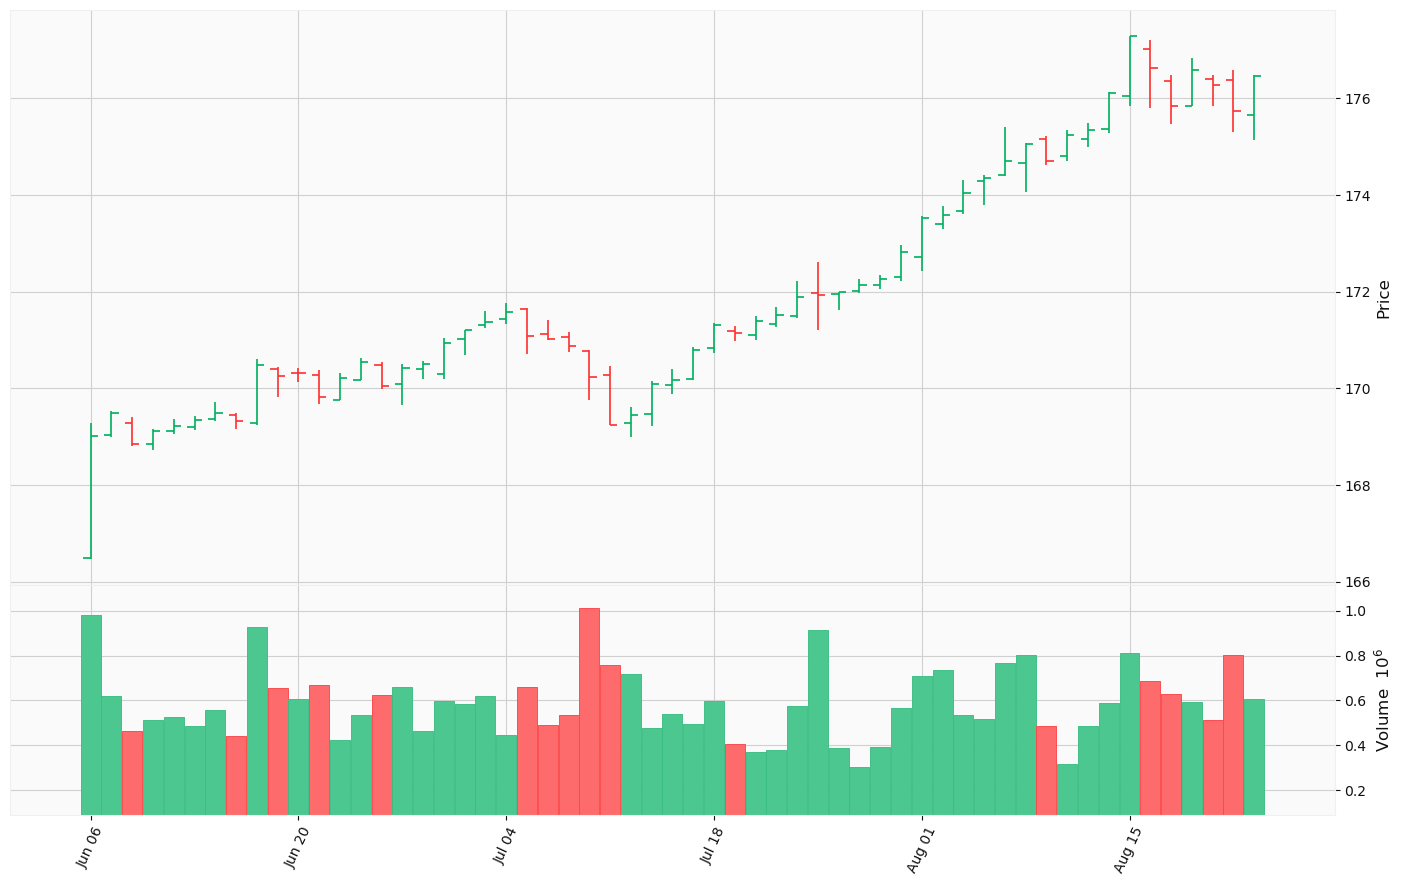

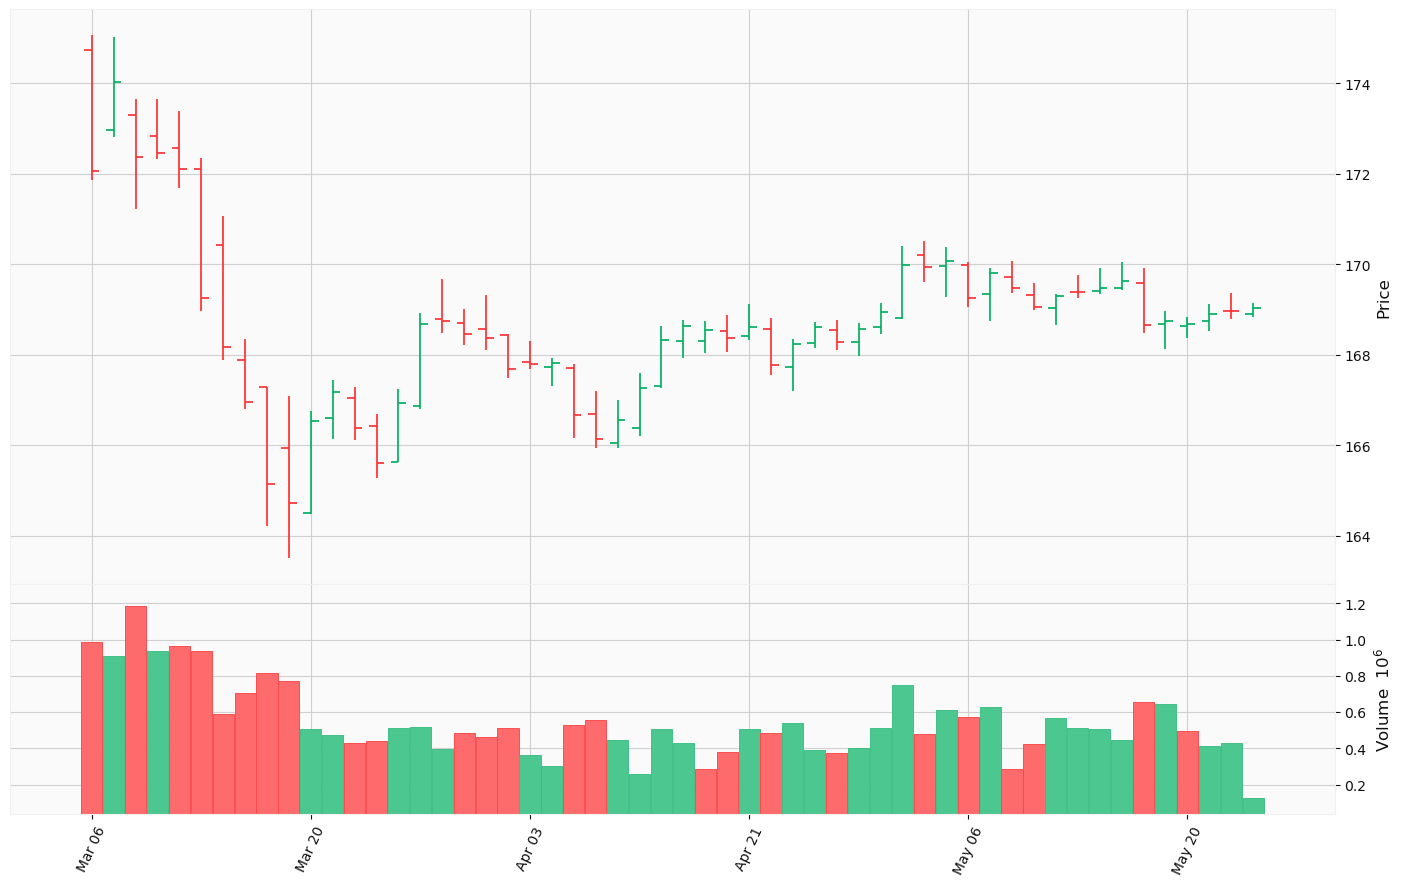

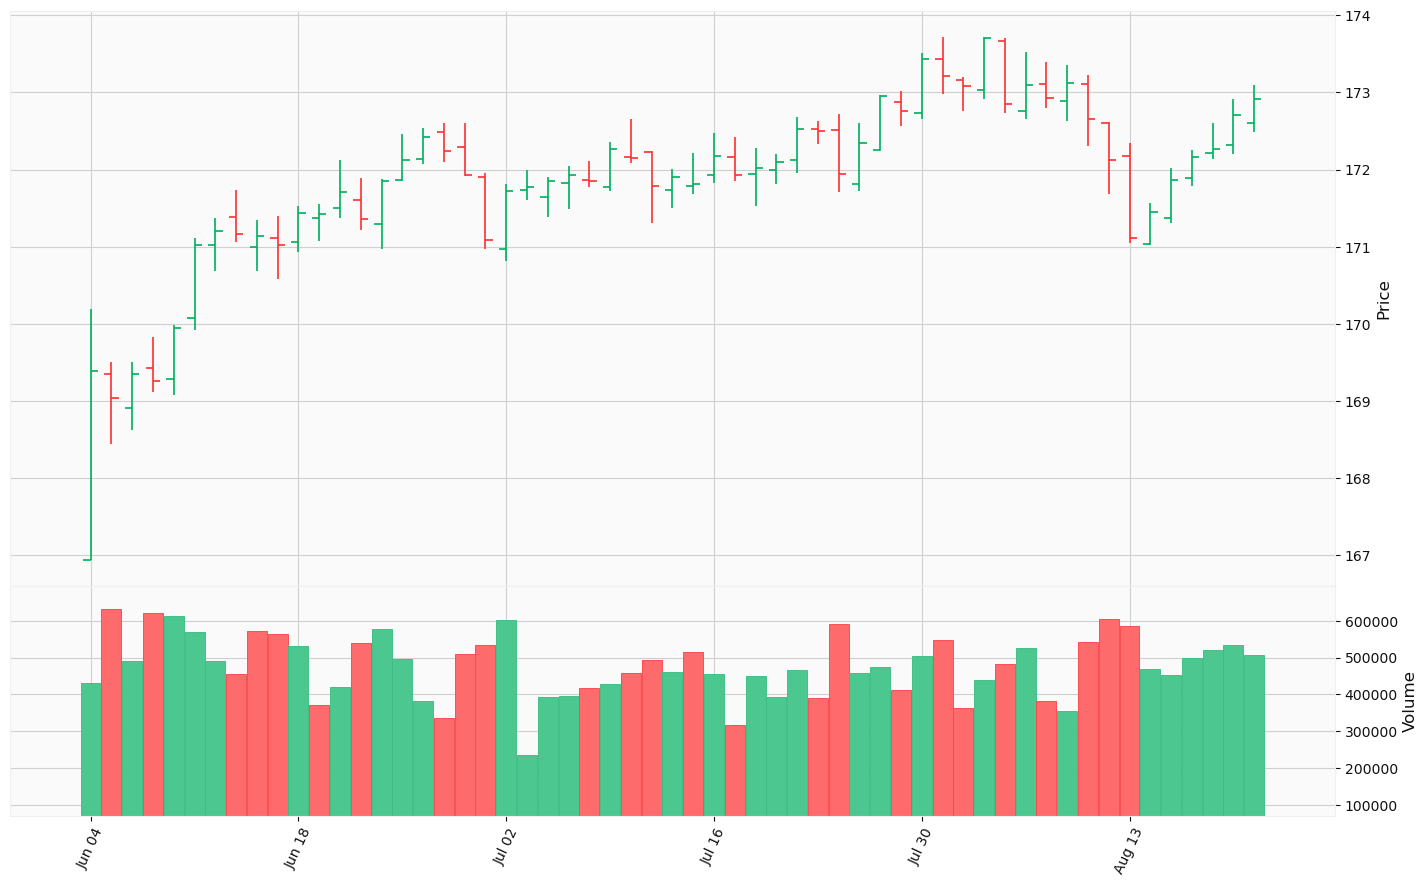

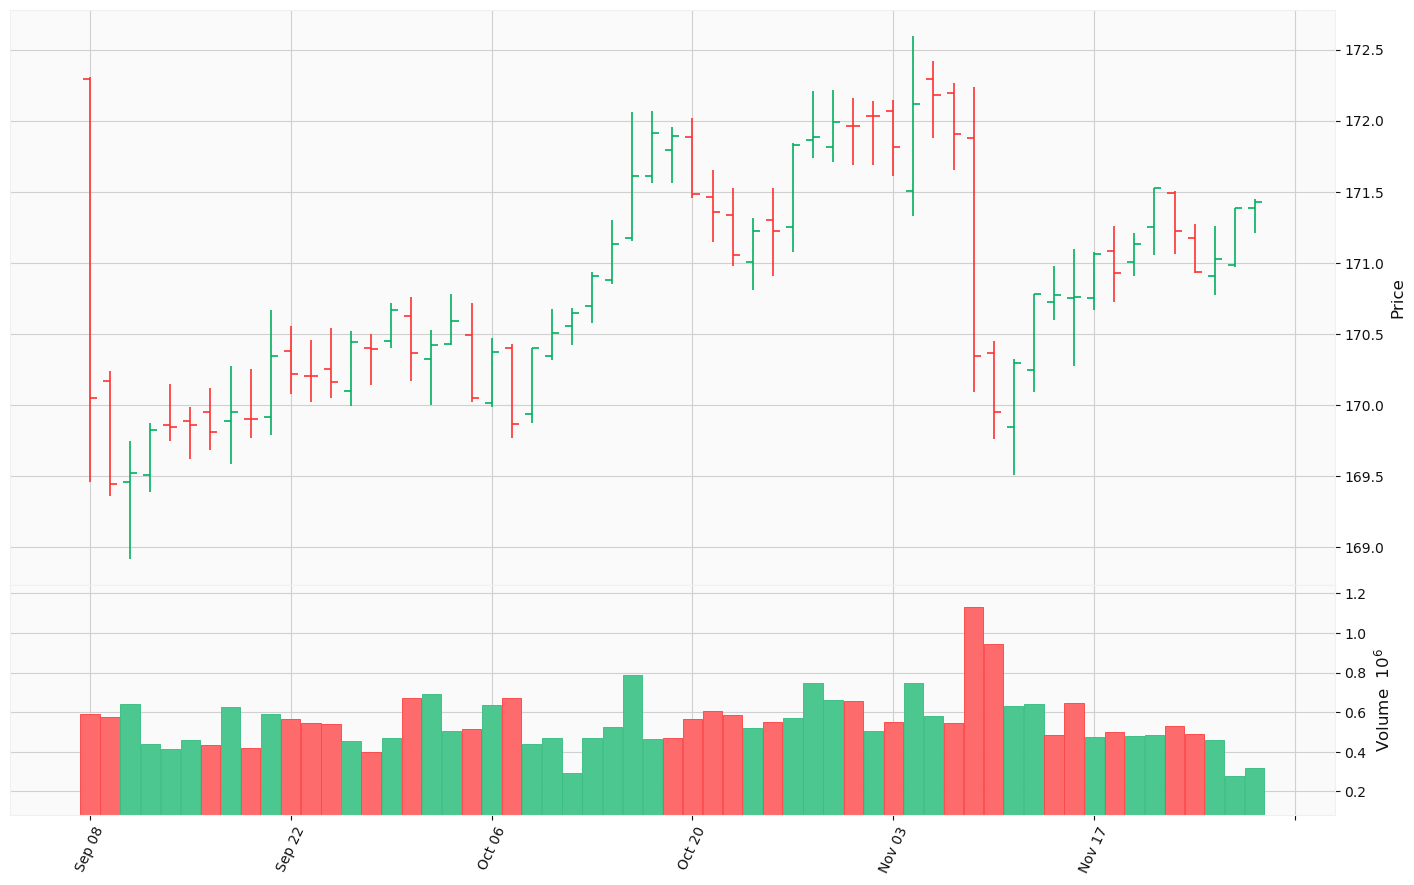

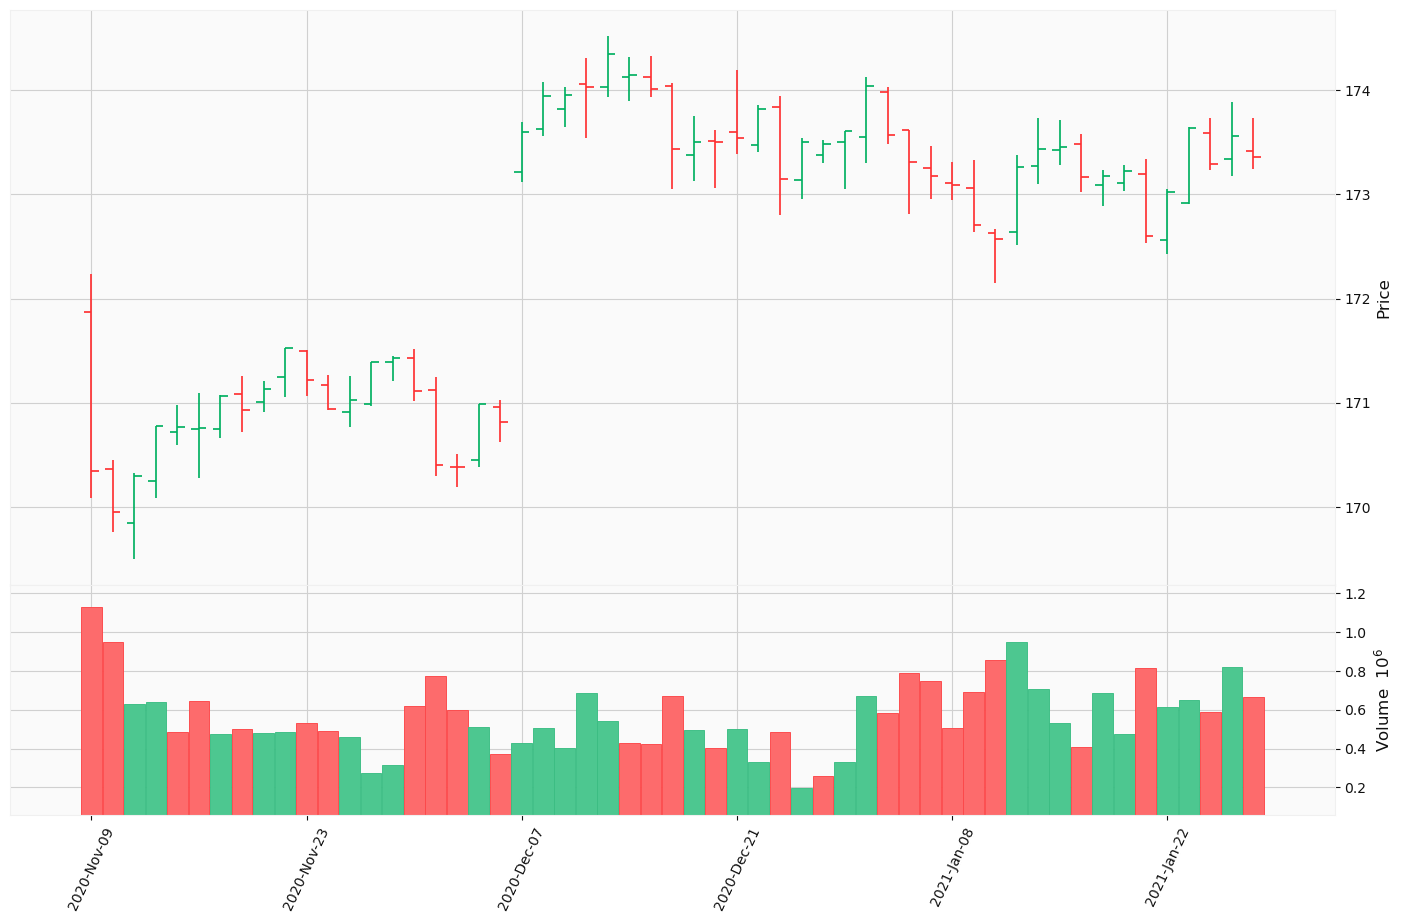

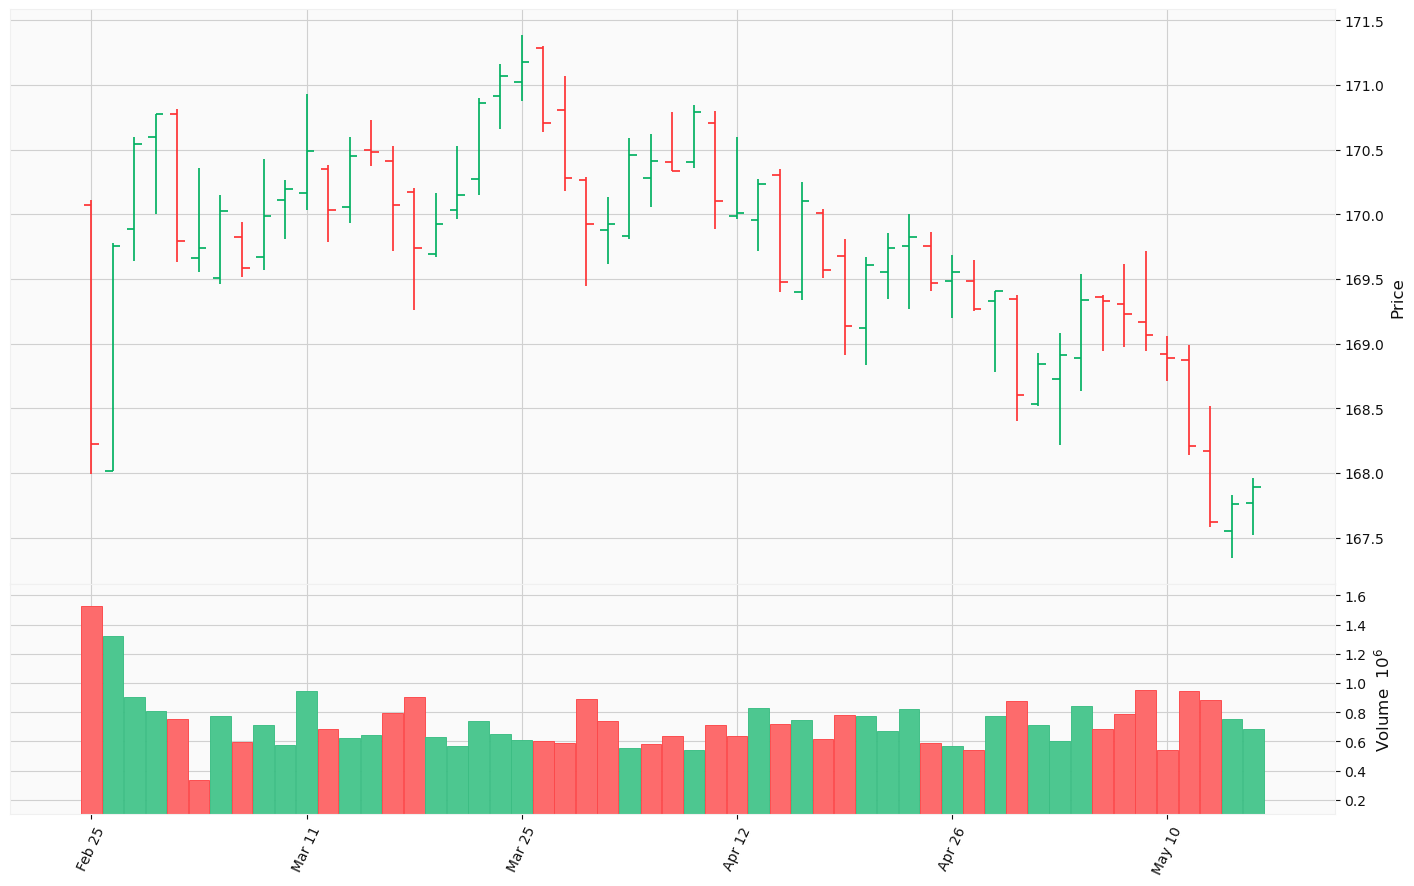

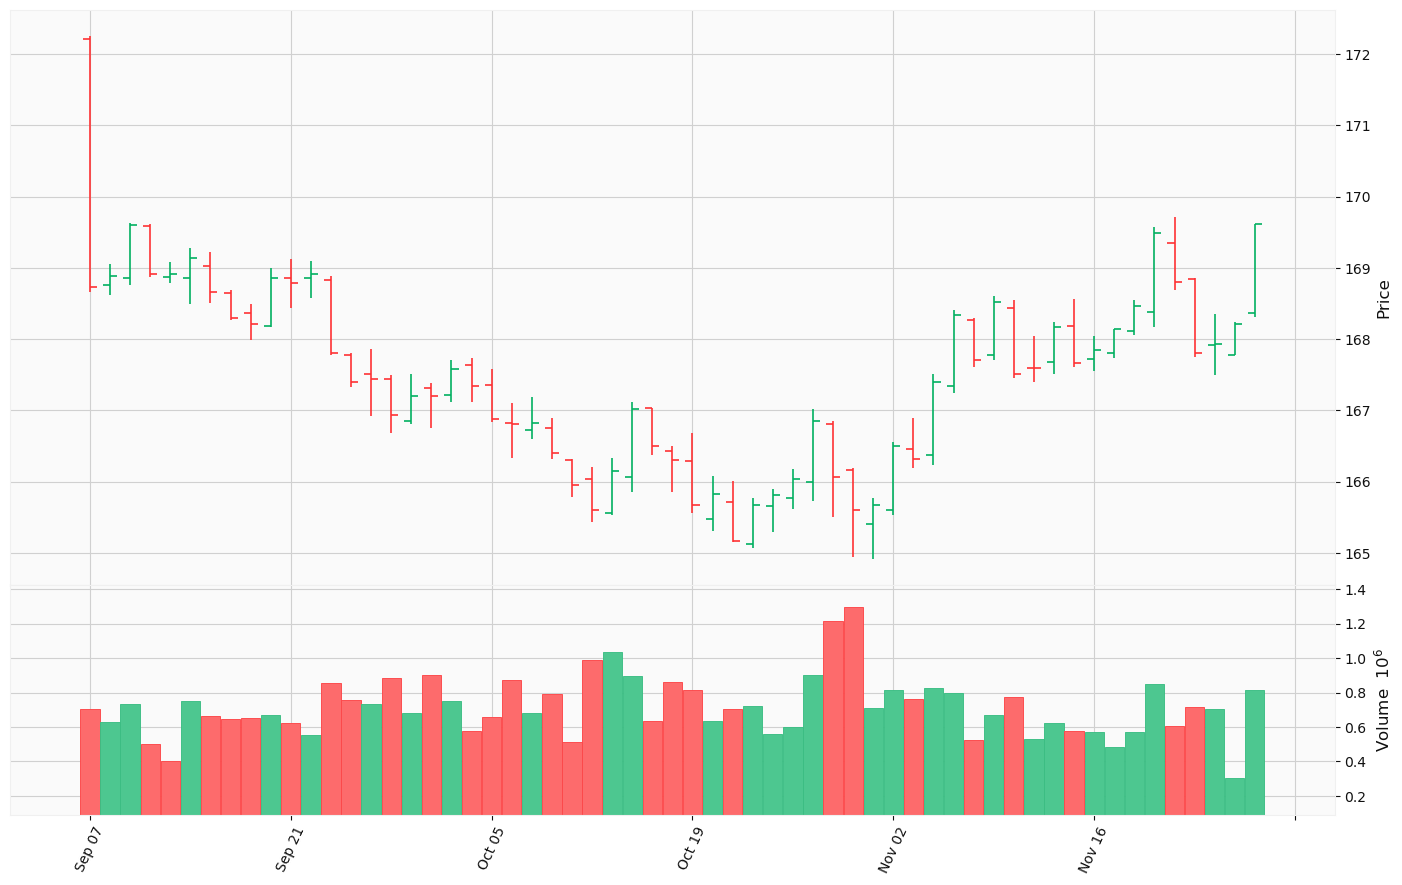

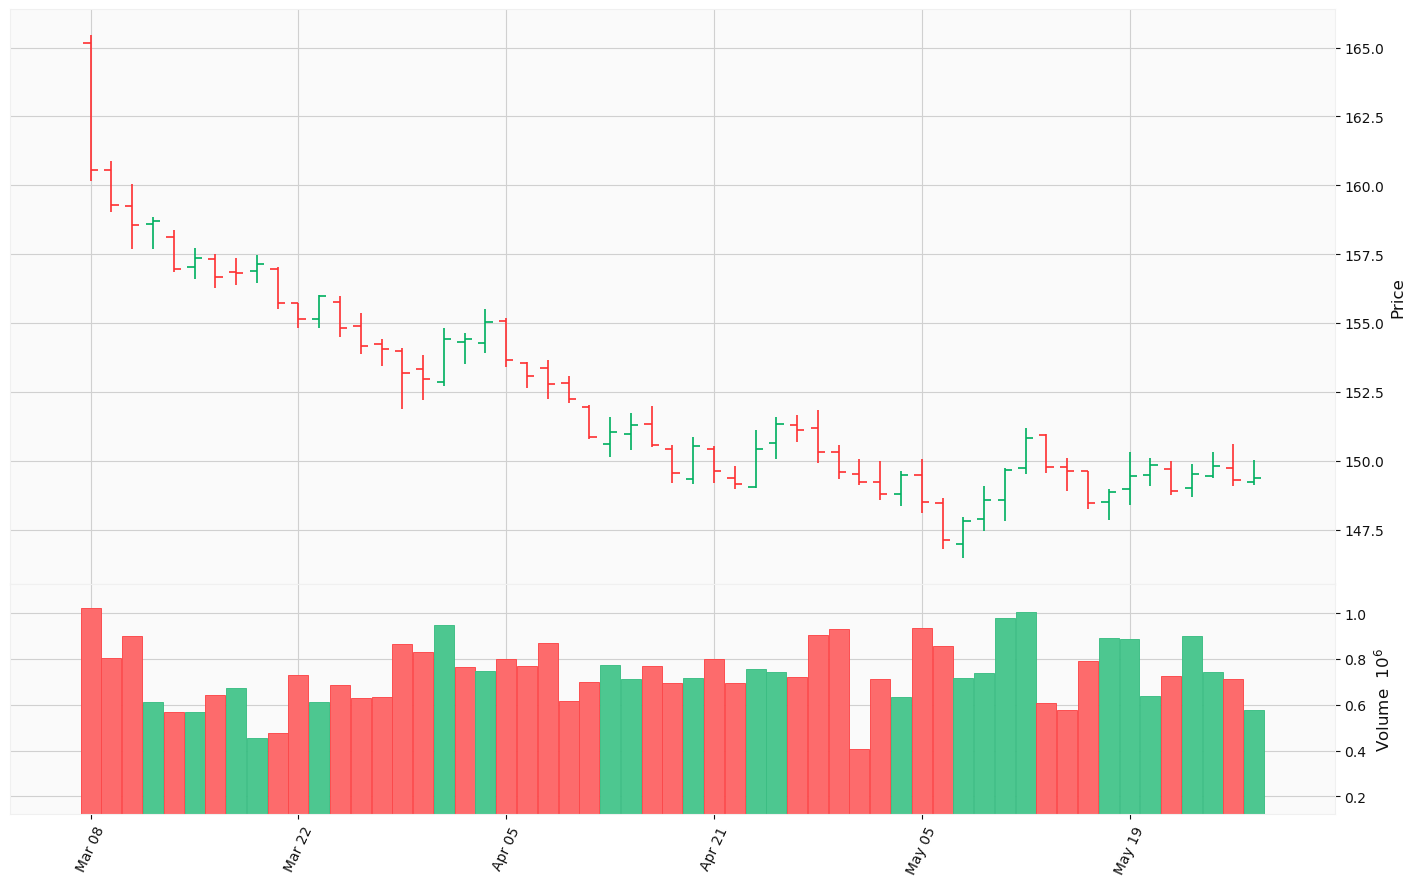

In [92]:

## PLot the daily data and check if lpausible
for Dt in Dates:
    candle_data = mpf.make_addplot(daten_daily[Dt:Dt+pd.DateOffset(days=8)][['Open', 'Close', 'High', 'Low',"Volume"]], type='candle')
        ###
        ## Now the INdicators noch, die ich sehen moechte:

    #p2=mpf.make_addplot(a_week["21dayEMA"])
    #p3=mpf.make_addplot(a_week["VP"])
    #p4=mpf.make_addplot(a_week["50dayEMA"])


    #plotsadded=[candle_data]

    ## Wecleh



    mpf.plot(daten_daily[Dt:Dt+pd.DateOffset(days=80)],style=mystyle, volume=True,  xrotation = 65,\
                                title="",figscale=2.0, \
                                figratio=(16, 10),returnfig=True)
    mpf.show() 

# Ermittle welche Zeitintervalle große Vola zeigenm

C:\Users\r889990\AppData\Local\Temp\2/ipykernel_27336/2111830828.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\r889990\AppData\Local\Temp\2/ipykernel_27336/2111830828.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



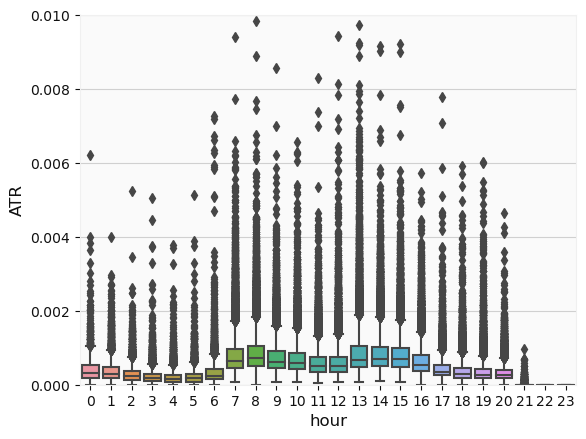

In [93]:
# Boxplot der Vola
data["ATR"]=abs(data["High"]-data["Low"])/(0.5*data["Close"]+0.5*data["Open"])
data["hour"]=data.index.hour

plt.ylim(0, 0.01)
ax = sns.boxplot(x="hour", y="ATR", data=data);
#ax = sns.swarmplot(x="Day", y="ATR", data=daten_daily, color="0.20");

# GIbte es Trend im Sinne von clustern mit Up Bewegungen ?

In [123]:
# in 1/4 stündlichem ursprünglichen Datensatz
dummy=data
dummy["pctchg"]=dummy["Close"].pct_change()
dummy['Factor'] =  (dummy['pctchg'] + 1).cumprod()

ba = np.where((data["pctchg"] < data["pctchg"].shift(1)),1,0)
dummy["ups"]=ba
bd = np.where((data["pctchg"] > data["pctchg"].shift(1)),-1,0)
dummy["downs"]=bd

C:\Users\r889990\AppData\Local\Temp\1/ipykernel_44896/3874455248.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\r889990\AppData\Local\Temp\1/ipykernel_44896/3874455248.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\r889990\AppData\Local\Temp\1/ipykernel_44896/3874455248.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [100]:
len(dummy)

57427

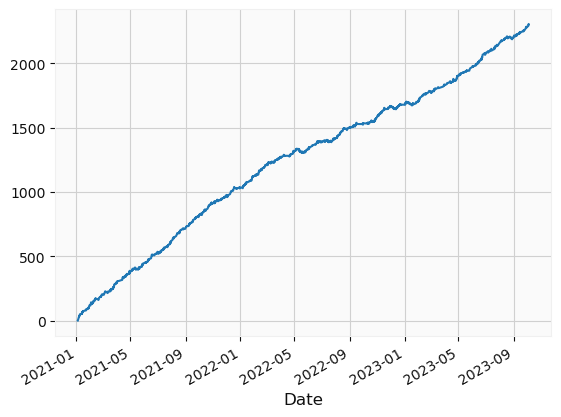

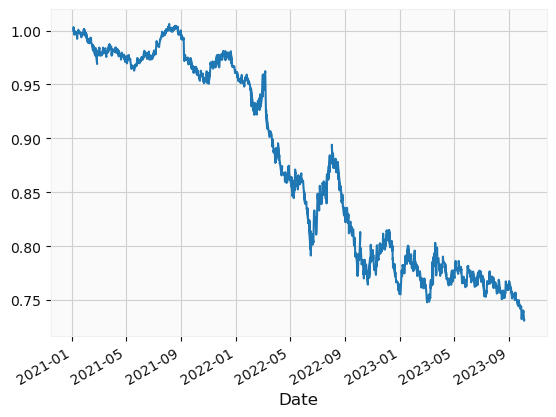

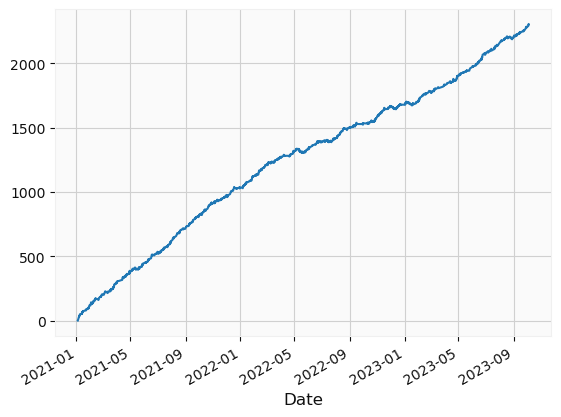

In [94]:
(dummy.ups.cumsum()+dummy.downs.cumsum()).plot()
plt.show()
dummy["Factor"].plot()
plt.show()
(dummy.ups+dummy.downs).cumsum().plot()

plt.show()


In [113]:
bd = np.where((daten["pctchg"] > daten["pctchg"].shift(1)),-1,0)
daten["downs"]=bd
ba = np.where((daten["pctchg"] < daten["pctchg"].shift(1)),1,0)
daten["ups"]=ba

#ba = np.where( (daten["pctchg"] < daten["pctchg"].shift(1)) & (daten["pctchg"].shift(1)< daten["pctchg"].shift(2),1,0))

In [101]:
dummy[["ups","downs"]].to_clipboard()

In [99]:
len(daten)

15030

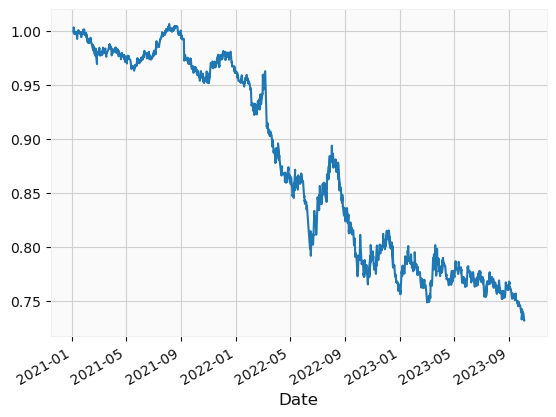

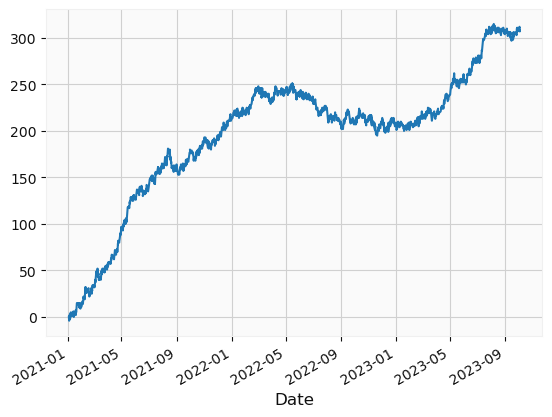

In [98]:
daten["Factor"].plot()
plt.show()
(daten.ups.cumsum()+daten.downs.cumsum()).plot()
plt.show()

## Clusteranalysem

In [154]:
def cluster_distribution(series, flag):
    clusters = []
    current_cluster = 0
    
    for digit in series:
        if digit == flag:
            current_cluster += 1
        elif current_cluster > 0:
            clusters.append(current_cluster)
            current_cluster = 0
    
    if current_cluster > 0:
        clusters.append(current_cluster)
    
    cluster_distribution = {}
    for cluster in clusters:
        if cluster in cluster_distribution:
            cluster_distribution[cluster] += 1
        else:
            cluster_distribution[cluster] = 1
    
    return cluster_distribution




def assign_cluster_numbers(series, flag ):
    clusters = []
    current_cluster = 0
    
    # Assign cluster numbers to 1s
    for digit in series:
        if digit == flag:
            current_cluster += 1
        elif current_cluster == 0:
            clusters.extend([99] * 1) 
        elif current_cluster > 0:
            clusters.extend([current_cluster] * current_cluster)
            current_cluster = 0
        
    if current_cluster > 0:
        clusters.extend([current_cluster] * current_cluster)
    
    return clusters

In [155]:
sizes = assign_cluster_numbers(ba,1)

In [133]:
ba

array([0, 0, 0, ..., 1, 0, 0])

In [124]:
dwn=cluster_distribution(bd,-1)
upn=cluster_distribution(ba,1)

<function matplotlib.pyplot.show(close=None, block=None)>

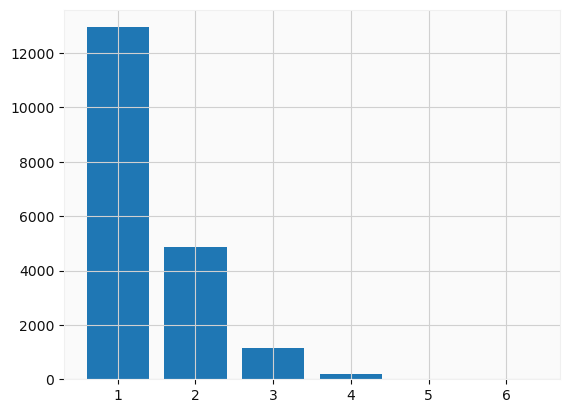

In [125]:
keys = list(dwn.keys())
values = list(dwn.values())    
plt.bar(keys, values)
plt.show

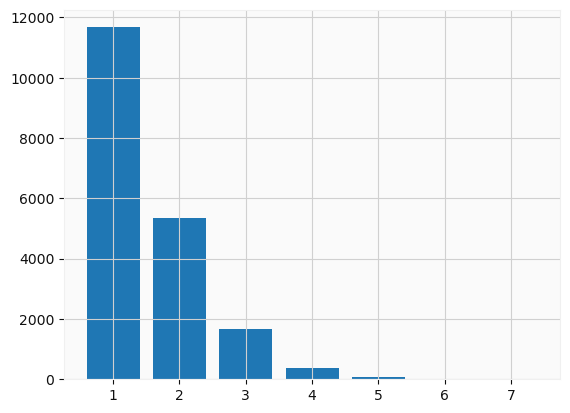

In [126]:
keys = list(upn.keys())
values = list(upn.values())    
plt.bar(keys, values)
plt.show()

# Lade Datumswerte mit Relevanz (e.g. FED Sitzungen, NFP, ...) und plotte als Vlines in candlegraph
Werden in "DoI" Liste abgelegt, so dass sie in mfp.plot als vertikale Linen sichbar werden

In [ ]:
#Alternativ:
Datumsfile="CrudeInventories.csv"
file_to_read="C:\\Temp\\Trading\\ETFS\\Mutterlisten\\\DataBase\\" + Datumsfile
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")
#custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M")
dts = pd.read_csv(file_to_read,sep=";",decimal='.',index_col=["Date"],parse_dates=['Date'],date_parser=custom_date_parser)
Dates_of_interst = dts.index.to_list()  

DoI=[Dates_of_interst[n].replace(hour=int(dts.iloc[n]["Time"][:2])) for n in range(len(Dates_of_interst)) ]
DoI=[DoI[n].replace(minute=int(dts.iloc[n]["Time"][3:5])) for n in range(len(DoI)) ]
Dates_of_interst=[]



intersection(DoI,data.index.to_list())

lower=100
upper=2000



candle_data = mpf.make_addplot(data[['Open', 'Close', 'High', 'Low',"Volume"]], type='candle')
    ###
    ## Now the INdicators noch, die ich sehen moechte:

#p2=mpf.make_addplot(a_week["21dayEMA"])
#p3=mpf.make_addplot(a_week["VP"])
#p4=mpf.make_addplot(a_week["50dayEMA"])


plotsadded=[candle_data]

## Wecleh
specialdates=intersection(DoI,data.index.to_list())


mpf.plot(data[startD:endD],style=mystyle, addplot=plotsadded, volume=True,  xrotation = 65,\
                            title="",figscale=2.0, \
                            vlines=dict(vlines=specialdates, linewidths=2,alpha=0.4
                                        ,colors="red"),\
                            figratio=(16, 10),returnfig=True)
mpf.show() 



# Berechen Verweildauern unter bestimmtem Movingaverage

In [ ]:
# Welches Zeitfenster fuer EMA : ?
# Es iegen 1/4 Std. Zeitreiehn vor
window = 460
data["Factor"]=(data["Close"].pct_change()+1).cumprod()
data["5dayEMA"]=data["Factor"].ewm(span=window,adjust=False).mean()


In [ ]:
ba = np.where( (data["Factor"]< data["5dayEMA"]) & (data["Factor"].shift(1)> data["5dayEMA"].shift(1)),-2,0)
ab =  np.where( (data["Factor"]> data["5dayEMA"]) & (data["Factor"].shift(1)< data["5dayEMA"].shift(1)),2,0)
data["buysell"]=ab+ba


In [ ]:
data.index.to_list()

# Irgendeine Strategie ausprobieren

In [ ]:
transactions=data[["Close","buysell"]].loc[data["buysell"] != 0]
transactions.at[transactions.index[-1],"buysell"]=transactions.iloc[-1]["buysell"]*0.5
transactions.at[transactions.index[0],"buysell"]=transactions.iloc[0]["buysell"]*0.5


In [ ]:
transactions

In [ ]:
transactions["flow"]=(-1.0)*transactions["Close"]*transactions["buysell"]

In [ ]:
transactions["pnl"]=transactions["flow"].cumsum()+0.5*transactions["buysell"]*transactions["Close"]
#transactions.at[transactions.index[-1],"pnl"]=0
transactions.at[transactions.index[0],"pnl"]=0

In [ ]:
transactions.to_clipboard()

In [ ]:
transactions[10:3000]["pnl"].plot()

In [ ]:
data[["Factor","5dayEMA"]].plot()

In [ ]:
data

In [ ]:
High_d

In [ ]:
High_d=data["High"].groupby(pd.Grouper(freq="H")).max()

<!-- ## plot sequence of time windows, e.g. 1500-1800 -->

In [ ]:
#Waehle Tage aus den Tageszeitreihen aus
Days=daten_daily[(daten_daily.index.weekday>=0)& (daten_daily.index.weekday<=4)]




In [ ]:
Days

In [ ]:
#onday_data_hourly_subset.index.isocalendar()

In [ ]:
#Week = Weeks.iloc[3]
#Week.name.isocalendar()
#Monday_data_hourly_subset[Monday_data_hourly_subset.index.isocalendar().week == 5]

In [ ]:
startzeit="16:00:00"
endzeit="23:45:00"

# 0 == Monday, 1= Tuesd...


Day1 = 2
Day2 = 3
## Waehle Tage aus den Stunden Zeitreiehn aus 

for d in [0,1,2]:
    TheDay_data_hourly=data[data.index.weekday==d]
    #TheDay_data_hourly=daten_hourly[daten_hourly.index.weekday==d]
#Friday_data_hourly=daten_hourly[daten_hourly.index.weekday==Day2]
# Waehle aus den gewählten TAgen das relevante Zeitfenseter heraus
### Wochentagspreise in den Zeitfenseter
    TheDay_data_hourly_subset=TheDay_data_hourly.loc[(TheDay_data_hourly.index.time >= pd.Timestamp(startzeit).time()) & (TheDay_data_hourly.index.time <= pd.Timestamp(endzeit).time())]

    occ=0
    for i in range(len(Weeks)):
        # Get the data for the specific Wednesday
        Week = Weeks.iloc[i]
        w=Week.name.strftime("%W")
        y=Week.name.strftime("%Y")
        Week=data[(data.index.strftime("%W") == w)&(data.index.strftime("%Y") == y)]
        # Filter the half-hourly data between 09:00 and 11:30 AM on that Wednesday
        TheDay_prices = TheDay_data_hourly_subset[(TheDay_data_hourly_subset.index.strftime("%W") == w)
                                          & (TheDay_data_hourly_subset.index.strftime("%Y") == y)]


        # Check if the maximum price during that time period is equal to the Wednesday's high
        #print("TheDay High: ",round(TheDay_prices['High'].max(),3),"  ", "TheWeekHigh: ",  round(Week["High"].max(),3))
        if round(TheDay_prices['High'].max(),3) >= round(Week["High"].max(),3):
            #print("catch!",round(TheDay_prices['High'].max(),3)," ", round(Week["High"].max(),3))
            occ += 1
            #TheDay_prices

    print(d, occ , len(Weeks))

In [ ]:
TheDay_data_hourly

In [ ]:
Weeks.iloc[0]


In [ ]:
TheDay_data_hourly=data[data.index.weekday==1]

In [ ]:
Week=Weeks.iloc[2]
w=Week.name.strftime("%W")
y=Week.name.strftime("%Y")
        # Filter the half-hourly data between 09:00 and 11:30 AM on that Wednesday
TheDay_data_hourly_subset=TheDay_data_hourly.loc[(TheDay_data_hourly.index.time >= pd.Timestamp(startzeit).time()) & (TheDay_data_hourly.index.time <= pd.Timestamp(endzeit).time())]
TheDay_prices = TheDay_data_hourly_subset[(TheDay_data_hourly_subset.index.strftime("%W") == w)
                                          & (TheDay_data_hourly_subset.index.strftime("%Y") == y)]


In [ ]:
TheDay_data_hourly.to_clipboard()

In [ ]:
Weeks.iloc[100]["High"],Weeks.iloc[100].name.strftime("%U"),Weeks.iloc[100].name.strftime("%Y")

In [ ]:
daten_daily[(daten_daily.index.strftime("%Y")=="2021")&(daten_daily.index.strftime("%U")=="49")]

In [ ]:
daten_hourly[(daten_hourly.index.strftime("%Y")=="2021")&(daten_hourly.index.strftime("%U")=="49")]["High"]

In [ ]:
timewindow

# plot Candles with high Volume/ATR  bars ?

In [ ]:
data[200:210].index.weekday

In [ ]:
# Filter die Markanten Punkte 

von = startdate2.value
bis = enddate2.value

z_dates = data[von:bis].loc[data[von:bis]["z-score"]>8.5].index
e_dates =[z_d +datetime.timedelta(days=20) for z_d in z_dates]

s_z_dates=[str(zd)  for zd in z_dates]
s_e_dates =[str(zd)  for zd in e_dates]

endmark=str((daten[:bis])[-1:].index[0])

points_h=[[(str(zd),daten.loc[zd]["High"]),(endmark,daten.loc[zd]["High"])] for zd  in z_dates]
points_l=[[(str(zd),daten.loc[zd]["Low"]),(endmark,daten.loc[zd]["Low"])] for zd  in z_dates]

points=points_l+points_h

#plotte 

# Wie man Linien in MPL plot einbaut:
# https://github.com/matplotlib/mplfinance/blob/master/examples/using_lines.ipynb

colors=['gray']


p=mpf.make_addplot(data[von:bis]["z-score"],panel=2)
mpf.plot(daten[von:bis], volume=True, 
         #hlines=dict(hlines=c,colors=['g','r']),
         alines=dict(alines=points, colors=colors),
         addplot=p, tight_layout=True,show_nontrading=False, figscale=2, type='candle')

In [ ]:
# Plot the 

In [ ]:

# mpf.plot(daten[von:bis], volume=True, 
#          #hlines=dict(hlines=c,colors=['g','r']),
#          alines=dict(alines=points, colors=colors),
#          tight_layout=True,show_nontrading=False, figscale=2, type='candle')

In [ ]:
fig, axes = plt.subplots(4,3,figsize=(100,500))

mpf.plot(data_2[2000:2050], ax=axes[0,0],  show_nontrading=False, type='candle')
mpf.plot(data_2[2050:2100], ax=axes[0,1],  show_nontrading=False, type='candle')
mpf.plot(data_2[2150:2200], ax=axes[0,2],  show_nontrading=False, type='candle')
mpf.plot(data_2[2250:2300], ax=axes[1,0],  show_nontrading=False, type='candle')
mpf.plot(data_2[2350:2400], ax=axes[1,1],  show_nontrading=False, type='candle')
mpf.plot(data_2[2450:2500], ax=axes[1,2],  show_nontrading=False, type='candle')
mpf.plot(data_2[2500:2550], ax=axes[2,0],  show_nontrading=False, type='candle')
mpf.plot(data_2[2650:2700], ax=axes[2,1],  show_nontrading=False, type='candle')
mpf.plot(data_2[2750:2800], ax=axes[2,2],  show_nontrading=False, type='candle')
mpf.plot(data_2[2850:2900], ax=axes[3,0],  show_nontrading=False, type='candle')
mpf.plot(data_2[2950:3000], ax=axes[3,1],  show_nontrading=False, type='candle')
mpf.plot(data_2[2450:2500], ax=axes[3,2],  show_nontrading=False, type='candle')
plt.show()

In [ ]:
type(data_2)

In [ ]:
data_2=data_2.dropna()
plot_system2(data_2[:50])
plot_system2(data_2[50:100])
#data_2

In [ ]:
data

In [ ]:
# plot sequence of time windows, e.g. 1500-1800
data_1530 = data.between_time('13:50', '20:00')
data_2 = data.between_time('15:00', '19:00')

f="H"
High_d=data_1530[["Open","High","Low","Close"]].groupby(pd.Grouper(freq=f)).max().max(axis=1)
Low_d=data_1530[["Open","High","Low","Close"]].groupby(pd.Grouper(freq=f)).min().min(axis=1)
open_d=data_1530["Open"].groupby(pd.Grouper(freq=f)).first()
volume_d=data_1530["Volume"].groupby(pd.Grouper(freq=f)).sum()
close_d=data_1530["Close"].groupby(pd.Grouper(freq=f)).last()


d = {"High":High_d,"Low":Low_d,"Open":open_d,"Close":close_d,"Volume":volume_d}
dail= pd.DataFrame(d)

mpf.plot(dail[1300:2000], volume=True, show_nontrading=False, figscale=5, type='candle')

data_2=data_2.dropna()
#plot_system2(data_2[:100])

In [ ]:
plot_system2(data.loc["2022-01-02 17:00":"2022-01-02 22:00"].append(data.loc["2022-06-02 17:00":"2022-06-02 22:00"]))

## Consolidate to daily or weekly or monthly bars

In [ ]:
#consolidate

f="M"
High_d=data[["Open","High","Low","Close"]].groupby(pd.Grouper(freq=f)).max().max(axis=1)
Low_d=data[["Open","High","Low","Close"]].groupby(pd.Grouper(freq=f)).min().min(axis=1)
open_d=data["Open"].groupby(pd.Grouper(freq=f)).first()
volume_d=data["Volume"].groupby(pd.Grouper(freq=f)).sum()
close_d=data["Close"].groupby(pd.Grouper(freq=f)).last()


d = {"High":High_d,"Low":Low_d,"Open":open_d,"Close":close_d,"Volume":volume_d}
dail= pd.DataFrame(d)
plot_system2(dail)

f="W"
High_d=data[["Open","High","Low","Close"]].groupby(pd.Grouper(freq=f)).max().max(axis=1)
Low_d=data[["Open","High","Low","Close"]].groupby(pd.Grouper(freq=f)).min().min(axis=1)
open_d=data["Open"].groupby(pd.Grouper(freq=f)).first()
volume_d=data["Volume"].groupby(pd.Grouper(freq=f)).sum()
close_d=data["Close"].groupby(pd.Grouper(freq=f)).last()


d = {"High":High_d,"Low":Low_d,"Open":open_d,"Close":close_d,"Volume":volume_d}
dail= pd.DataFrame(d)
plot_system2(dail)

In [ ]:
pp=[mpf.make_addplot(dail["Close"],panel=1),mpf.make_addplot(dail["Volume"],panel=2)]
mpf.plot(dail,addplot=pp,type='candle',panel_ratios=(3,1), figscale=1.5)

In [ ]:
#Schreibe raus den z-score
############################
df = pd.DataFrame()
### Formeln geprueft und korrekt:
# ############################################################################## 
# mit positivem time_gap in .diff(time_gap):  df[t]= (f(t)-f(t-time_gap))/f(t)
# also Veränderung ggü. f(t)
### Also backward looking return !
df["back_"+str(t_bwd)]= 100*(data["Close"].diff(t_bwd)/data["Close"])

# mit negativem time_gap in .diff(time_gap):  df[t]= (f(t+time_gap)-f(t))/f(t)
# also Veränderung ggü. f(t). Der klassische Differenzenequotient also !!!!
### Also forckward looking return      
df["fwd_"+str(t_fwd)]= 100*(-data["Close"].diff(-t_fwd)/data["Close"])
#################################################################################
fwd_yield=df["fwd_"+str(t_fwd)].dropna()
hist_cum_plot(fwd_yield,ticker+": r_(+"+str(t_fwd)+"d)"+" yield Histogramm ",30) 


####   select where backward threshold has been passed


if greatersmaller=="greater":
    a = df["fwd_"+str(t_fwd)][df["back_"+str(t_bwd)] > r_bwd]
elif greatersmaller=="smaller":
    a = df["fwd_"+str(t_fwd)][df["back_"+str(t_bwd)] < r_bwd]

a_with_threshold_backward = a.dropna()
####   select where forward threshold has been passed AS WELL :
#a_with_threshold_backward_forward =a_with_threshold_backward[a_with_threshold_backward>=r_fwd]

fg, ax = plt.subplots(figsize=(16,12))
ax.bar(a_with_threshold_backward.index.to_list(),a_with_threshold_backward)
ax.set_title("Dates, fullfilling bwd condition and the yield after fwd days")
plt.show(block=False)

#figupdate_nonHist(fig00,"Datum","---> Rendite nach "+ str(t_fwd)+ " Bars" + " ab r>" + str(r_fwd




##### renditen nach time_gap_back Zeitschrittten Statistik:
backward = df["back_"+str(t_bwd)].dropna()
hist_cum_plot(backward,ticker+": r_(-"+str(t_bwd)+"d)"+" yield Histogramm ",30) 

# fig, ax = plt.subplots(2,figsize=(16,12))
# ax.set_title(str(t_bwd)+"day yield Histogramm ")
# sns.histplot(backward,bins =30,stat="density",ax=ax[0])
# print(backward.describe())
# sns.histplot(backward,bins =30,cumulative=1,stat="density",ax=ax[1])

#### bilde das Histogrammobjekt, um die Cummulierten Wahrscienlichkeiten zu berechen
backward_hist = np.histogram(backward, bins=my_bins)
backward_hist_dist = scipy.stats.rv_histogram(backward_hist)

### 3. Histogramm der Renditen nach "time_gap_back" Tagen


### 2. Histogramm
laenge = len(a_with_threshold_backward)
pos = a_with_threshold_backward[a_with_threshold_backward>0]
neg = a_with_threshold_backward[a_with_threshold_backward<0]
negativ = len(neg)
positiv = len(pos)
tite =  condi + "\n"  + " t_bwd= -"+ str(t_bwd)+" bars,  t_fwd = "+ str(t_fwd)+ " bars "
tite = tite +"\n" + "Anzahl fwd Intervalle mit r(t_fwd)>0 : "+str(positiv) + "|" +  " r(t_fwd) < 0 : "  + str(negativ) + "|"+ "p(r<0): " + str(round(negativ/laenge,2)) + "|"  
tite = tite + "p(r>0): " +str(round(positiv/laenge,2)) + ", <r_pos>: " +  str(round(pos.mean(),2)) + ", <r_neg>: " +  str(round(neg.mean(),2))
#ax = b_df.plot.hist(bins=my_bins,title="a)"+tit)
hist_cum_plot(a_with_threshold_backward,ticker+": "+tite,30,True) 
z=2

    ##RSI_strat_SETUP.figures_to_html([fig, figs[0],figRSIHist,fig0,fig1,fig2,fig3,fig4],RSI_strat_SETUP.output_path + "dashboard.html")


# if len(sys.argv)>=3:
#     universe = sys.argv[1]
#     ticker = sys.argv[2]
# else:
#     print("No Input from you; Need 2 Inputs=> <UNiverse> <ticker>")
#     exit()

# tickers = [ticker,]

In [ ]:
data